# Анализ лояльности пользователей Яндекс Афиши
- Автор: Эвинян Карине Воваевна
- Дата:   10.02.2026г.

# Цели и задачи проекта

<font color='#777778'> 

Цель проекта - предоставить заказчикам обоснованные рекомендации и данные, которые помогут им принять взвешенные решения не только по привлечению новых пользователей, но и удержанию, превращению их в постоянных. 

В ходе выполнения проекта решим следующие задачи: познакомимся с данными, проверим их корректность и проведем предобработку, проведем исследовательский анализ данных, сопровождающийся необходимыми визуализациями. 

# Содержимое проекта

1. [загрузка данных и знакомство с ними](#загрузка-данных-и-знакомство-с-ними)

   1.1 [загрузка данных](#загрузка-данных)
   
   1.2 [изучение общей информации и их оценка](#изучение-общей-информации-и-их-оценка)
   
   1.3 [промежуточный вывод по первому разделу](#промежуточный-вывод-по-первому-разделу)
   
   
2. [предобработка данных](#предобработка-данных)

   2.1 [приведение выручки к российскому рублю](#приведение-выручки-к-российскому-рублю)
   
   2.2 [проверка ошибок в данных и их предобработка](#проверка-ошибок-в-данных-и-их-предобработка)
   
   2.3 [проверка распределения численных данных](#проверка-распределения-численных-данных)
   
   2.4 [промежуточный вывод по второму разделу](#промежуточный-вывод-по-второму-разделу)
   
      
3. [профиль пользователя](#профиль-пользователя)

   3.1 [создание профиля пользователя](#создание-профиля-пользователя)
   
   3.2 [изучение данных о профилях пользователей](#изучение-данных-о-профилях-пользователей)
   
   3.3 [промежуточный вывод по третьему разделу](#промежуточный-вывод-по-третьему-разделу)
        
   
4. [исследовательский анализ данных](#исследовательский-анализ-данных)
   
   4.1 [исследование признаков первого заказа и их связи с возвращением на платформу](#исследование-признаков-первого-заказа-и-их-связи-с-возвращением-на-платформу)
   
      4.1.1 [распределение пользователей по признакам](#распределение-пользователей-по-признакам)
   
      4.1.2 [анализ возвратов пользователей](#анализ-возвратов-пользователей)
      
      4.1.3 [проверка продуктовых гипотез](#проверка-продуктовых-гипотез)
            
    4.2 [исследование поведения пользователей через показатели выручки и состава заказа](#исследование-поведения-пользователей-через-показатели-выручки-и-состава-заказа)
    
      4.2.1 [задача 1](#задача-1)
      
      4.2.2 [задача 2](#задача-2)
      
      4.2.3 [задача 3](#задача-3)
                 
    4.3 [исследование временных характеристик первого заказа и их влияния на повторные покупки](#исследование-временных-характеристик-первого-заказа-и-их-влияния-на-повторные-покупки)
    
      4.3.1 [задача первая](#задача-первая)
      
      4.3.2 [задача вторая](#задача-вторая)
            
    4.4 [корреляционный анализ количества покупок и признаков пользователя](#корреляционный-анализ-количества-покупок-и-признаков-пользователя)
      
      4.4.1 [корреляционный анализ](#корреляционный-анализ)
      
    4.5 [промежуточный вывод по четвертому разделу](#промежуточный-вывод-по-четвертому-разделу)
      
     
5. [общий вывод и рекомендации](#общий-вывод-и-рекомендации)

6. [финализация проекта и публикация в Git](#финализация-проекта-и-публикация-в-Git)

# Этапы выполнения проекта

### загрузка данных и знакомство с ними

---

####  загрузка данных
**Задача 1.1** Напишите SQL-запрос, выгружающий в датафрейм pandas необходимые данные. Используйте следующие параметры для подключения к базе данных `data-analyst-afisha`:

- **Хост** — `rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net`
- **База данных** — `data-analyst-afisha`
- **Порт** — `6432`
- **Аутентификация** — `Database Native`
- **Пользователь** — `praktikum_student`
- **Пароль** — `Sdf4$2;d-d30pp`

Для выгрузки используйте запрос из предыдущего урока и библиотеку SQLAlchemy.

Выгрузка из базы данных SQL должна позволить собрать следующие данные:

- `user_id` — уникальный идентификатор пользователя, совершившего заказ;
- `device_type_canonical` — тип устройства, с которого был оформлен заказ (`mobile` — мобильные устройства, `desktop` — стационарные);
- `order_id` — уникальный идентификатор заказа;
- `order_dt` — дата создания заказа (используйте данные `created_dt_msk`);
- `order_ts` — дата и время создания заказа (используйте данные `created_ts_msk`);
- `currency_code` — валюта оплаты;
- `revenue` — выручка от заказа;
- `tickets_count` — количество купленных билетов;
- `days_since_prev` — количество дней от предыдущей покупки пользователя, для пользователей с одной покупкой — значение пропущено;
- `event_id` — уникальный идентификатор мероприятия;
- `service_name` — название билетного оператора;
- `event_type_main` — основной тип мероприятия (театральная постановка, концерт и так далее);
- `region_name` — название региона, в котором прошло мероприятие;
- `city_name` — название города, в котором прошло мероприятие.

---


In [1]:
# Используйте ячейки типа Code для вашего кода,
# а ячейки типа Markdown для комментариев и выводов

In [2]:
# При необходимости добавляйте новые ячейки для кода или текста

In [11]:
# Запускаем команду для установки SQLAlchemy в нашей тетрадке Jupyter Notebook:
!pip install sqlalchemy
# Устанавливаем модуль psycopg2 (необходим для подключения к базе данных):
!pip install psycopg2-binary
# Импортируем библиотеки
import os
import getpass
import subprocess
import sys
import pandas as pd
from sqlalchemy import create_engine
!pip install python-dotenv
from dotenv import load_dotenv
# Загружаем библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns
!pip install phik -U
# Загружаем библиотеку
from phik import phik_matrix

In [ ]:
# Вариант для безопасного подключения
try:
    from dotenv import load_dotenv
except ImportError:
    subprocess.check_call([sys.executable, '-m', 'pip', 'install', 'python-dotenv'])
    from dotenv import load_dotenv

load_dotenv()

def set_env(var: str):
    if not os.environ.get(var):
        os.environ[var] = getpass.getpass(f"{var}: ")

In [ ]:
# Устанавливаем необходимые переменные окружения
set_env('USER')
set_env('PASSWORD')
set_env('HOST')
set_env('PORT')
set_env('NAME')

In [ ]:
# Формируем строку подключения с использованием переменных окружения
connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(
    os.getenv('USER'),
    os.getenv('PASSWORD'),
    os.getenv('HOST'),
    os.getenv('PORT'),
    os.getenv('NAME'),
)

In [ ]:
# Создаем соединение с базой данных
engine = create_engine(connection_string)

Готово! К базе подключились, теперь можем извлечь результаты SQL-запроса.

In [ ]:
# Записываем запрос в переменную query для извлечения результатов SQL-запроса:
query = '''
WITH set_config_precode AS (
  SELECT set_config('synchronize_seqscans', 'off', true)
)
SELECT user_id,
       device_type_canonical,
       order_id,
       created_dt_msk AS order_dt,
       created_ts_msk AS order_ts,
       currency_code,
       revenue, 
       tickets_count,
       EXTRACT(DAY FROM (created_dt_msk - LAG(created_dt_msk) OVER (PARTITION BY user_id ORDER BY created_dt_msk))) 
         AS days_since_prev,
       e.event_id,
       e.event_name_code AS event_name,
       p.service_name,
       e.event_type_main,
       r.region_name,
       c.city_name
FROM afisha.purchases AS p
INNER JOIN afisha.events AS e ON p.event_id = e.event_id
JOIN afisha.city AS c ON e.city_id = c.city_id
JOIN afisha.regions AS r ON c.region_id = r.region_id
WHERE e.event_type_main != 'фильм' AND device_type_canonical IN ('mobile', 'desktop')
ORDER BY user_id ASC
''' 

In [ ]:
# Записываем результат выдачи SQL-запроса в датафрейм с помощью метода pd.read_sql_query():
df = pd.read_sql_query(query, con=engine)

---

#### изучение общей информации и их оценка
**Задача 1.2** Изучите общую информацию о выгруженных данных. Оцените корректность выгрузки и объём полученных данных.

Предположите, какие шаги необходимо сделать на стадии предобработки данных — например, скорректировать типы данных.

Зафиксируйте основную информацию о данных в кратком промежуточном выводе.

---

In [17]:
# Выводим первые строки датафрейма df на экран
df.head()

,user_id,device_type_canonical,order_id,order_dt,order_ts,currency_code,revenue,tickets_count,days_since_prev,event_id,event_name,service_name,event_type_main,region_name,city_name
0,0002849b70a3ce2,mobile,4359165,2024-08-20,2024-08-20 16:08:03,rub,1521.94,4,NaN,169230,f0f7b271-04eb-4af6-bcb8-8f05cf46d6ad,Край билетов,театр,Каменевский регион,Глиногорск
1,0005ca5e93f2cf4,mobile,7965605,2024-07-23,2024-07-23 18:36:24,rub,289.45,2,NaN,237325,40efeb04-81b7-4135-b41f-708ff00cc64c,Мой билет,выставки,Каменевский регион,Глиногорск
2,0005ca5e93f2cf4,mobile,7292370,2024-10-06,2024-10-06 13:56:02,rub,1258.57,4,75.0,578454,01f3fb7b-ed07-4f94-b1d3-9a2e1ee5a8ca,За билетом!,другое,Каменевский регион,Глиногорск
3,000898990054619,mobile,1139875,2024-07-13,2024-07-13 19:40:48,rub,8.49,2,NaN,387271,2f638715-8844-466c-b43f-378a627c419f,Лови билет!,другое,Североярская область,Озёрск
4,000898990054619,mobile,972400,2024-10-04,2024-10-04 22:33:15,rub,1390.41,3,83.0,509453,10d805d3-9809-4d8a-834e-225b7d03f95d,Билеты без проблем,стендап,Озернинский край,Родниковецк


In [18]:
# Выводим информацию о датафрейме  df 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290611 entries, 0 to 290610
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   user_id                290611 non-null  object        
 1   device_type_canonical  290611 non-null  object        
 2   order_id               290611 non-null  int64         
 3   order_dt               290611 non-null  datetime64[ns]
 4   order_ts               290611 non-null  datetime64[ns]
 5   currency_code          290611 non-null  object        
 6   revenue                290611 non-null  float64       
 7   tickets_count          290611 non-null  int64         
 8   days_since_prev        268678 non-null  float64       
 9   event_id               290611 non-null  int64         
 10  event_name             290611 non-null  object        
 11  service_name           290611 non-null  object        
 12  event_type_main        290611 non-null  obje

####  промежуточный вывод по первому разделу


Выгрузка из базы данных SQL осуществлена корректно, наименования всех столбцов соответствуют ожидаемым. 

**После первичного анализа данных можно сделать следующие выводы.**

Датафрейм `df` содержит 15 столбцов и 290611 строк, в которых представлена информация о покупках пользователей Яндекс Афиши.

**Названия столбцов**: `user_id`, `device_type_canonical`, `order_id`, `order_dt`, `order_ts`, `currency_code`, `revenue`, `tickets_count`, `days_since_prev`, `event_id`, `event_name`, `service_name`, `event_type_main`,  `region_name`, `city_name`  соответствуют их содержимому. Структура стандартная для подобных датафреймов.

**Названия столбцов** в целом осмысленные, пробелы отсутствуют, названия указаны в нижнем регистре. Это может облегчить обращение к столбцам в коде. Все названия столбцов соответствуют единому стилю (в языке программирования Python snake case принят за правило).

**Количество ненулевых значений**  в столбце `days_since_prev` (количество дней от предыдущей покупки пользователя, для пользователей с одной покупкой — значение пропущено) отличается от общего количества строк, что свидетельствует о наличии пользователей с одной покупкой. Напротив в остальных столбцах пропуски отсутствуют.  

**Изучим типы данных и их корректность.**

Часть представленных данных (столбцы: `user_id`, `currecy_code`, `event_name`, `service_name`, `region_name`, `city_name`) содержат строковые значения и хранятся в типе `object`; часть - числовые значения и хранятся в типах данных `int64` (`order_id`, `tickets_count`, `event_id`) или `float64` (`revenue`). Значения в столбцах  `order_dt` и `order_ts` представлены типом данных `datetime64[ns]`. 
**Некорректными типами данных** представлены столбцы: `device_type_canonical`, содержащий информацию о типах устройства, с которого был оформлен заказ (`mobile` — мобильные устройства, `desktop` — стационарные), и `event_type_main`, который хранит информацию об основном типе мероприятия (театральная постановка, концерт и так далее), их нужно привести к типу данных `category`. Столбец `days_since_prev` необходимо привести к типу данных `int64`. 

**Понижаем разрядность числовых данных** Необходимо понизить разрядность значений в столбцах `order_id`, `revenue`, `tickets_count`, `days_since_prev`,  `event_id`.

В столбце `order_dt` **(тип данных `datetime64[ns]`)** обнулим время и оставим только дату, а в столбце `order_ts` **(тип данных `datetime64[ns]`)** уберем наносекунды.

---

###  предобработка данных

Выполните все стандартные действия по предобработке данных:

---

#### приведение выручки к российскому рублю
**Задача 2.1** Данные о выручке сервиса представлены в российских рублях и казахстанских тенге. Приведите выручку к единой валюте — российскому рублю.

Для этого используйте датасет с информацией о курсе казахстанского тенге по отношению к российскому рублю за 2024 год — `final_tickets_tenge_df.csv`. Его можно загрузить по пути `https://code.s3.yandex.net/datasets/final_tickets_tenge_df.csv')`

Значения в рублях представлено для 100 тенге.

Результаты преобразования сохраните в новый столбец `revenue_rub`.

---


In [19]:
# Выгружаем данные датасета с информацией о курсе казахстанского тенге по отношению к российскому рублю за 2024 год
# в переменную tenge_df
tenge_df = pd.read_csv('https://code.s3.yandex.net/datasets/final_tickets_tenge_df.csv')

In [20]:
# Выводим первые строки датафрейма tenge_df на экран
tenge_df.head()

,data,nominal,curs,cdx
0,2024-01-10,100,19.9391,kzt
1,2024-01-11,100,19.7255,kzt
2,2024-01-12,100,19.5839,kzt
3,2024-01-13,100,19.4501,kzt
4,2024-01-14,100,19.4501,kzt


In [21]:
# Выводим информацию о датафрейме tenge_df 
tenge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   data     357 non-null    object 
 1   nominal  357 non-null    int64  
 2   curs     357 non-null    float64
 3   cdx      357 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 11.3+ KB


Датафрейм `tenge_df` содержит 357 строк, в которых представлена информация о курсе казахстанского тенге по отношению к российскому рублю за 2024 год. В 2024 году (высокосном) было 366 дней. Значит в данном датафрейме отсутствует информация о курсе за 9 дней. Поэтому отсутствующие данные необходимо будет заполнить. Столбец `data` представлен типом данных `object`, что некорректно, поэтому в далее преобразуем этот столбец в тип `datetime`.

In [22]:
# Преобразуем столбец 'data' в датафрейме tenge_df в тип datetime
tenge_df['data'] = pd.to_datetime(tenge_df['data'])

In [23]:
# Отсортируем даты в tenge_df
tenge_df = tenge_df.sort_values(by='data')

In [24]:
# Создаем полный диапазон дат на 2024 год
full_date_range = pd.date_range(start='2024-01-01', end='2024-12-31')

In [25]:
# Переиндексируем tenge_df по полному диапазону дат
tenge_df.set_index('data', inplace=True)
tenge_df = tenge_df.reindex(full_date_range)

In [26]:
# Выводим строки с пропусками
rows_with_nan = tenge_df[tenge_df.isna().any(axis=1)]
display(rows_with_nan)

,nominal,curs,cdx
2024-01-01,NaN,NaN,NaN
2024-01-02,NaN,NaN,NaN
2024-01-03,NaN,NaN,NaN
2024-01-04,NaN,NaN,NaN
2024-01-05,NaN,NaN,NaN
2024-01-06,NaN,NaN,NaN
2024-01-07,NaN,NaN,NaN
2024-01-08,NaN,NaN,NaN
2024-01-09,NaN,NaN,NaN


Это праздничные дни, поэтому заполним пропущенные значения курса последующими значениями.

In [27]:
# Заполняем пропуски последующими значениями
tenge_df['curs'] = tenge_df['curs'].fillna(method='bfill')

In [28]:
# Получаем курс для каждой даты в df. Мы используем метод map, чтобы добавить новый столбец curs в df, который содержит курс
# для каждой даты заказа. Если для какой-то даты нет курса, значение будет NaN. Но в нашем случае выше мы заполнили пропуски.
df['curs'] = df['order_dt'].map(tenge_df['curs'])

In [29]:
# Рассчитаем выручку в рублях и сохраним в новом столбце. Если валюта рубли (rub), то выручка остается без изменений. Если
# валюта тенге (kzt), то выручка переведется в рубли по курсу. Здесь важно, что курс указан на 100 тенге, поэтому мы делим
# на 100. Если валюта не распознана, то устанавливаем значение 0 (но у нас и так изначально все валюты указаны корректно).
df['revenue_rub'] = df.apply(
    lambda row: row['revenue'] if row['currency_code'] == 'rub' 
    else row['revenue'] * row['curs'] / 100 if row['currency_code'] == 'kzt' 
    else 0, axis=1
)

In [30]:
# Отбираем только нужные столбцы
df = df[['user_id', 'device_type_canonical', 'order_id', 'order_dt','order_ts', 'currency_code', 'revenue', 'tickets_count',
         'days_since_prev', 'event_id', 'event_name', 'service_name', 'event_type_main', 'region_name', 'city_name', 
         'revenue_rub']]

In [31]:
# Выводим датафрейм df
display(df)

,user_id,device_type_canonical,order_id,order_dt,order_ts,currency_code,revenue,tickets_count,days_since_prev,event_id,event_name,service_name,event_type_main,region_name,city_name,revenue_rub
0,0002849b70a3ce2,mobile,4359165,2024-08-20,2024-08-20 16:08:03,rub,1521.94,4,NaN,169230,f0f7b271-04eb-4af6-bcb8-8f05cf46d6ad,Край билетов,театр,Каменевский регион,Глиногорск,1521.94
1,0005ca5e93f2cf4,mobile,7965605,2024-07-23,2024-07-23 18:36:24,rub,289.45,2,NaN,237325,40efeb04-81b7-4135-b41f-708ff00cc64c,Мой билет,выставки,Каменевский регион,Глиногорск,289.45
2,0005ca5e93f2cf4,mobile,7292370,2024-10-06,2024-10-06 13:56:02,rub,1258.57,4,75.0,578454,01f3fb7b-ed07-4f94-b1d3-9a2e1ee5a8ca,За билетом!,другое,Каменевский регион,Глиногорск,1258.57
3,000898990054619,mobile,1139875,2024-07-13,2024-07-13 19:40:48,rub,8.49,2,NaN,387271,2f638715-8844-466c-b43f-378a627c419f,Лови билет!,другое,Североярская область,Озёрск,8.49
4,000898990054619,mobile,972400,2024-10-04,2024-10-04 22:33:15,rub,1390.41,3,83.0,509453,10d805d3-9809-4d8a-834e-225b7d03f95d,Билеты без проблем,стендап,Озернинский край,Родниковецк,1390.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290606,fffcd3dde79eb2c,mobile,368591,2024-10-27,2024-10-27 17:54:52,rub,965.57,4,0.0,33189,e3dcdb45-9eaa-4ce4-9b85-1562e548172e,Весь в билетах,другое,Каменевский регион,Глиногорск,965.57
290607,fffcd3dde79eb2c,mobile,368562,2024-10-27,2024-10-27 17:53:53,rub,1448.36,6,0.0,33189,e3dcdb45-9eaa-4ce4-9b85-1562e548172e,Весь в билетах,другое,Каменевский регион,Глиногорск,1448.36
290608,fffcd3dde79eb2c,desktop,8473772,2024-10-30,2024-10-30 13:37:43,rub,178.95,2,3.0,205231,74883818-57a6-494a-b162-bb0260877cbf,Прачечная,театр,Каменевский регион,Глиногорск,178.95
290609,fffeeb3c120cf0b,desktop,5526067,2024-09-24,2024-09-24 10:07:42,rub,661.53,2,NaN,454526,6f4c6a50-0106-407b-8f54-332c740b01da,Билеты без проблем,стендап,Широковская область,Ягодиновка,661.53


В результате преобразований датафреймм df содержит ещё один столбец `revenue_rub`.

In [32]:
# Выводим информацию о датафрейме  df: 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290611 entries, 0 to 290610
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   user_id                290611 non-null  object        
 1   device_type_canonical  290611 non-null  object        
 2   order_id               290611 non-null  int64         
 3   order_dt               290611 non-null  datetime64[ns]
 4   order_ts               290611 non-null  datetime64[ns]
 5   currency_code          290611 non-null  object        
 6   revenue                290611 non-null  float64       
 7   tickets_count          290611 non-null  int64         
 8   days_since_prev        268678 non-null  float64       
 9   event_id               290611 non-null  int64         
 10  event_name             290611 non-null  object        
 11  service_name           290611 non-null  object        
 12  event_type_main        290611 non-null  obje

Теперь датафрейм df содержит 16 столбцов и 290611 строк. Объем занимаемой памяти составляет 35.5 MB.

In [33]:
# Создаем копию датафрейма до преобразований для возможности проверить сделанные изменения после предобработки
temp = df.copy() 
len(temp)

290611

---

#### проверка ошибок в данных и их предобработка 

**Задача 2.2**
- Проверьте данные на пропущенные значения. Если выгрузка из SQL была успешной, то пропуски должны быть только в столбце `days_since_prev`.
- Преобразуйте типы данных в некоторых столбцах, если это необходимо. Обратите внимание на данные с датой и временем, а также на числовые данные, размерность которых можно сократить.
- Изучите значения в ключевых столбцах. Обработайте ошибки, если обнаружите их.
    - Проверьте, какие категории указаны в столбцах с номинальными данными. Есть ли среди категорий такие, что обозначают пропуски в данных или отсутствие информации? Проведите нормализацию данных, если это необходимо.
    - Проверьте распределение численных данных и наличие в них выбросов. Для этого используйте статистические показатели, гистограммы распределения значений или диаграммы размаха.
        
        Важные показатели в рамках поставленной задачи — это выручка с заказа (`revenue_rub`) и количество билетов в заказе (`tickets_count`), поэтому в первую очередь проверьте данные в этих столбцах.
        
        Если обнаружите выбросы в поле `revenue_rub`, то отфильтруйте значения по 99 перцентилю.

После предобработки проверьте, были ли отфильтрованы данные. Если были, то оцените, в каком объёме. Сформулируйте промежуточный вывод, зафиксировав основные действия и описания новых столбцов.

---

In [34]:
# Выводим количество пропущенных строк в датафрейме
df.isna().sum()

user_id                      0
device_type_canonical        0
order_id                     0
order_dt                     0
order_ts                     0
currency_code                0
revenue                      0
tickets_count                0
days_since_prev          21933
event_id                     0
event_name                   0
service_name                 0
event_type_main              0
region_name                  0
city_name                    0
revenue_rub                  0
dtype: int64

In [35]:
# Выводим информацию о пропусках
def show_missing_stats(tmp0):
    """
    Функция для отображения статистики пропущенных значений в DataFrame.
    """
    missing_stats = pd.DataFrame({
        'Кол-во пропусков': tmp0.isnull().sum(),
        'Доля пропусков': tmp0.isnull().mean()
    })
    missing_stats = missing_stats[missing_stats['Кол-во пропусков'] > 0]
    
    if missing_stats.empty:
        return "Пропусков в данных нет"
    
# Форматируем при выводе через Styler:
    return (missing_stats.style.format({'Доля пропусков': '{:.4f}'}).background_gradient(cmap='coolwarm'))
show_missing_stats(df)

,Кол-во пропусков,Доля пропусков
days_since_prev,21933,0.0755


Выгрузка из SQL была успешной, поэтому пропуски только в столбце `days_since_prev` (21933 пропуска, что составляет 7.6%). Пропуски заменим на 0, так как они свидетельствуют о совершении пользователями одной покупки.

In [36]:
# Заменим все NaN на 0 перед преобразованием типа данных с помощью метода fillna()
df['days_since_prev'] = df['days_since_prev'].fillna(0).astype('int')

In [37]:
# Преобразуем тип данных столбца `device_type_canonical` к типу `category`, так как речь идет о фиксированном наборе уникальных
# типов 
df['device_type_canonical'] = df['device_type_canonical'].astype('category')

In [38]:
# Преобразуем тип данных столбца `event_type_main` к типу `category`, так как речь идет о фиксированном наборе уникальных
# типов мероприятий
df['event_type_main'] = df['event_type_main'].astype('category')

In [39]:
# Понижаем разрядность числовых данных с 64 до 32, 8, 16, 32 соответственно:
for column in ['order_id', 'tickets_count','days_since_prev', 'event_id']:
    df[column] = pd.to_numeric(df[column], downcast='integer')

In [40]:
# Понижаем разрядность числовых данных с 64 до 32:
for column in ['revenue', 'revenue_rub']:
    df[column] = pd.to_numeric(df[column], downcast='float')

In [41]:
# Используем метод .normalize(), который обнуляет время и оставляет только дату
df['order_dt'] = df['order_dt'].dt.normalize()

In [42]:
# Преобразуем столбец order_ts, убрав наносекунды
df['order_ts'] = df['order_ts'].dt.floor('S')

In [43]:
# Проверим типы данных в датафрейме после преобразований
display(df.dtypes)

user_id                          object
device_type_canonical          category
order_id                          int32
order_dt                 datetime64[ns]
order_ts                 datetime64[ns]
currency_code                    object
revenue                         float32
tickets_count                      int8
days_since_prev                   int16
event_id                          int32
event_name                       object
service_name                     object
event_type_main                category
region_name                      object
city_name                        object
revenue_rub                     float32
dtype: object

Теперь столбцы представлены корректными типами данных.

In [44]:
# Выводим информацию о датафрейме  df после преобразований: 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290611 entries, 0 to 290610
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   user_id                290611 non-null  object        
 1   device_type_canonical  290611 non-null  category      
 2   order_id               290611 non-null  int32         
 3   order_dt               290611 non-null  datetime64[ns]
 4   order_ts               290611 non-null  datetime64[ns]
 5   currency_code          290611 non-null  object        
 6   revenue                290611 non-null  float32       
 7   tickets_count          290611 non-null  int8          
 8   days_since_prev        290611 non-null  int16         
 9   event_id               290611 non-null  int32         
 10  event_name             290611 non-null  object        
 11  service_name           290611 non-null  object        
 12  event_type_main        290611 non-null  cate

Типы данных откорректированы, разрядность отдельных столбцов понижена. После проведенных преобразований общее количество памяти, используемой датафреймом, уменьшилось на 11.9 MB и составило 23.6 MB, что свидетельствует об оптимизации использования памяти.

In [45]:
# Список столбцов с номинальными данными
nominal_columns = [
    'currency_code',
    'region_name',
    'city_name'
]

In [46]:
# Проверим уникальные категории в каждом из столбцов
for column in nominal_columns:
    unique_values = df[column].unique()
    display(f"Уникальные значения в столбце {column}: {unique_values}")

"Уникальные значения в столбце currency_code: ['rub' 'kzt']"

"Уникальные значения в столбце region_name: ['Каменевский регион' 'Североярская область' 'Озернинский край'\n 'Лугоградская область' 'Поленовский край' 'Широковская область'\n 'Медовская область' 'Златопольский округ' 'Малиновоярский округ'\n 'Яблоневская область' 'Ветренский регион' 'Боровлянский край'\n 'Крутоводская область' 'Ягодиновская область' 'Серебряноярский округ'\n 'Лесодальний край' 'Верхоречная область' 'Горицветская область'\n 'Речиновская область' 'Травиницкий округ' 'Сосновская область'\n 'Серебринская область' 'Травяная область' 'Каменноярский край'\n 'Солнечноземская область' 'Светополянский округ' 'Заречная область'\n 'Ручейковский край' 'Глиногорская область' 'Тепляковская область'\n 'Каменноозёрный край' 'Солнечнореченская область' 'Зоринский регион'\n 'Берёзовская область' 'Лесостепной край' 'Малиновая область'\n 'Синегорский регион' 'Луговая область' 'Шанырский регион'\n 'Каменополянский округ' 'Речицкая область' 'Горностепной регион'\n 'Речицкий регион' 'Золоток

"Уникальные значения в столбце city_name: ['Глиногорск' 'Озёрск' 'Родниковецк' 'Кристалевск' 'Дальнозолотск'\n 'Радужнополье' 'Радужсвет' 'Кумсай' 'Верховино' 'Светополье' 'Кокжар'\n 'Каменский' 'Лесоярич' 'Никольянов' 'Речинцево' 'Лесозолотск'\n 'Дальнозерск' 'Серебрянка' 'Островецк' 'Родниковец' 'Дальнесветск'\n 'Луговаярово' 'Дальнополин' 'Ягодиновка' 'Солчелуг' 'Озёрчане'\n 'Серебровино' 'Лесоярово' 'Глинополье' 'Глиноград' 'Дальнесветин'\n 'Северополье' 'Теплоозеро' 'Горнодолинск' 'Ордакент' 'Озёрово'\n 'Луговинск' 'Лугоград' 'Златопольск' 'Крутовинск' 'Сарыжар' 'Сосновечин'\n 'Тихоярск' 'Яблонецк' 'Жаркентай' 'Широковка' 'Синеводов' 'Синеводск'\n 'Тихосветск' 'Радужанов' 'Глиногорь' 'Каменосветск' 'Родниковск'\n 'Травогород' 'Глинянск' 'Радужинск' 'Поляногорье' 'Дальнолесье'\n 'Ручейник' 'Ключеград' 'Ключеводск' 'Поленовино' 'Речичанск'\n 'Ключевополье' 'Шаныртау' 'Дальнесоснов' 'Ордасай' 'Теплоозёрск'\n 'Чистогорье' 'Ручейный' 'Островярово' 'Ягодинск' 'Поленоозёрово'\n 'Акбасты'

Значения в выше приведенных столбцах уникальны.

In [47]:
# Проверяем уникальные значения в столбцах
for column in ['device_type_canonical', 'event_type_main']:
    display(f'Уникальные значения в столбце {column}:')
    display(df[column].sort_values().unique())
    display()

'Уникальные значения в столбце device_type_canonical:'

['desktop', 'mobile']
Categories (2, object): ['desktop', 'mobile']

'Уникальные значения в столбце event_type_main:'

['выставки', 'другое', 'концерты', 'спорт', 'стендап', 'театр', 'ёлки']
Categories (7, object): ['выставки', 'другое', 'концерты', 'спорт', 'стендап', 'театр', 'ёлки']

Значения в столбце 'device_type_canonical' уникальны. А вот в столбце 'event_type_main' напротив.

In [48]:
# Выводим количество вхождений каждого уникального значения
display(df['device_type_canonical'].value_counts())

mobile     232490
desktop     58121
Name: device_type_canonical, dtype: int64

In [49]:
# Выводим количество вхождений каждого уникального значения
display(df['event_type_main'].value_counts())

концерты    115276
театр        67321
другое       65867
спорт        21911
стендап      13393
выставки      4854
ёлки          1989
Name: event_type_main, dtype: int64

Среди категорий есть "другое", что обозначает отсутствие информации. Некоторые мероприятия не категоризированы. В целях избежания искажения анализа не будем их никак обрабатывать.

In [50]:
# Проверяем уникальные значения в столбцe
unique_order_ids = df['order_id'].nunique()
total_order_ids = df['order_id'].count()

if unique_order_ids == total_order_ids:
    display("Все order_id уникальны.")
else:
    display(f"Некоторые order_id дублируются: {total_order_ids - unique_order_ids} дубликатов.")

'Все order_id уникальны.'

In [51]:
# Проверяем уникальные значения в столбцe
for column in ['service_name']:
    display(f'Уникальные значения в столбце {column}:')
    display(df[column].sort_values().unique())
    display()

'Уникальные значения в столбце service_name:'

array(['Crazy ticket!', 'Show_ticket', 'Билет по телефону',
       'Билеты без проблем', 'Билеты в интернете', 'Билеты в руки',
       'Быстробилет', 'Быстрый кассир', 'Весь в билетах', 'Восьмёрка',
       'Вперёд!', 'Выступления.ру', 'Городской дом культуры',
       'Дом культуры', 'Дырокол', 'За билетом!', 'Зе Бест!', 'КарандашРУ',
       'Кино билет', 'Край билетов', 'Лимоны', 'Лови билет!',
       'Лучшие билеты', 'Мир касс', 'Мой билет', 'Облачко', 'Прачечная',
       'Радио ticket', 'Реестр', 'Росбилет', 'Тебе билет!', 'Телебилет',
       'Тех билет', 'Цвет и билет', 'Шоу начинается!', 'Яблоко'],
      dtype=object)

In [52]:
# Выводим количество вхождений каждого уникального значения (для названий)
display(df['service_name'].value_counts())

Билеты без проблем        63519
Лови билет!               41124
Билеты в руки             40343
Мой билет                 34839
Облачко                   26642
Лучшие билеты             17774
Весь в билетах            16849
Прачечная                 10273
Край билетов               6207
Тебе билет!                5228
Яблоко                     5039
Дом культуры               4502
За билетом!                2865
Городской дом культуры     2733
Show_ticket                2200
Мир касс                   2167
Быстробилет                2003
Выступления.ру             1616
Восьмёрка                  1118
Crazy ticket!               790
Росбилет                    539
Шоу начинается!             499
Быстрый кассир              381
Радио ticket                376
Телебилет                   321
КарандашРУ                  133
Реестр                      125
Билет по телефону            85
Вперёд!                      80
Дырокол                      74
Кино билет                   67
Цвет и б

Все названия билетного оператора уникальны.

In [53]:
# Список столбцов с номинальными данными
nominal_other_columns = [
    'order_id',
    'order_ts',
    'currency_code',
    'revenue',
    'tickets_count',
    'days_since_prev',
    'event_name',
    'region_name',
    'city_name',
    'revenue_rub'
]

In [54]:
# Проверяем на наличие пропусков и специальных значений
for column in nominal_other_columns:
    missing_values = df[column].isnull().sum()  # Количество NaN
    empty_strings = (df[column] == '').sum()  # Количество пустых строк
    special_values = df[column].isin(['unknown', 'не указано']).sum()  # Специальные значения
    
    display(f"{column}: NaN = {missing_values}, пустые строки = {empty_strings}, 'unknown' или 'не указано' = {special_values}")

"order_id: NaN = 0, пустые строки = 0, 'unknown' или 'не указано' = 0"

"order_ts: NaN = 0, пустые строки = 0, 'unknown' или 'не указано' = 0"

"currency_code: NaN = 0, пустые строки = 0, 'unknown' или 'не указано' = 0"

"revenue: NaN = 0, пустые строки = 0, 'unknown' или 'не указано' = 0"

"tickets_count: NaN = 0, пустые строки = 0, 'unknown' или 'не указано' = 0"

"days_since_prev: NaN = 0, пустые строки = 0, 'unknown' или 'не указано' = 0"

"event_name: NaN = 0, пустые строки = 0, 'unknown' или 'не указано' = 0"

"region_name: NaN = 0, пустые строки = 0, 'unknown' или 'не указано' = 0"

"city_name: NaN = 0, пустые строки = 0, 'unknown' или 'не указано' = 0"

"revenue_rub: NaN = 0, пустые строки = 0, 'unknown' или 'не указано' = 0"

Проверка показала отсутствие специальных значений и пропусков.

In [55]:
# Проверяем на явные дубликаты
duplicates = df.duplicated()

# Выводим явные дубликаты
display(df[duplicates])

,user_id,device_type_canonical,order_id,order_dt,order_ts,currency_code,revenue,tickets_count,days_since_prev,event_id,event_name,service_name,event_type_main,region_name,city_name,revenue_rub


Явные дубликаты отсутвуют в датафрейме.

In [56]:
# Проверяем количество неявных дубликатов
num_duplicates = df.duplicated(subset=['user_id', 'order_ts', 'revenue_rub', 'tickets_count', 'service_name']).sum()
display(f"Количество неявных  дубликатов: {num_duplicates}")

'Количество неявных  дубликатов: 46'

Количество неявных дубликатов равно 46, что составляет 0.02%, удалим их.

In [57]:
# Удаляем неявные дубликаты
df.drop_duplicates(subset=['user_id', 'order_ts', 'revenue_rub', 'tickets_count', 'service_name'], inplace=True)

In [58]:
# Проверяем количество оставшихся строк после удаления неявных дубликатов
display(f"Количество строк после удаления неявных дубликатов: {len(df)}")

'Количество строк после удаления неявных дубликатов: 290565'

In [59]:
# Проверим сколько строк датфрейма удалено
a, b = len(temp), len(df)
display(a, b, round((a-b)/a*100, 2))

290611

290565

0.02

Потеря данных незначительная и составила 0.02%.

#### проверка распределения численных данных 

In [60]:
# Список численных столбцов
numerical_columns = [
    'tickets_count',
    'revenue_rub'
]

In [61]:
# Получение статистических показателей для численных данных
statistics = df[numerical_columns].describe()
display(statistics)

,tickets_count,revenue_rub
count,290565.000000,290565.000000
mean,2.754317,555.596191
std,1.170608,875.534851
min,1.000000,-90.760002
25%,2.000000,113.970001
50%,3.000000,351.140015
75%,4.000000,802.049988
max,57.000000,81174.539062


 Статистика по полю tickets_count

Среднее значение (mean) равно 2.75, то есть в среднем пользователи заказывают около 3 билетов. Стандартное отклонение (std) составило 1.17. Это говорит о том, что количество билетов, которое заказывают пользователи, варьируется, и большинство значений находятся в пределах одного стандартного отклонения от среднего. Минимум (min) равен 1, то есть минимальное количество заказанных билетов составляет 1. Максимум (max) равен 57. Это указывает на наличие пользователей, которые заказывают значительно больше билетов, чем среднее значение. 25-й процентиль равен 2. Это значит, что 25% пользователей заказывают 2 или меньше билетов. 50-й процентиль (медиана) равен 3. Это говорит о том, что половина пользователей заказывает 3 или меньше билетов. 75-й процентиль равен 4. Это означает, что 75% пользователей заказывают 4 или меньше билетов.

 Статистика по полю revenue_rub

Среднее значение (mean) составило 555.60 руб. Это средний доход от заказов. Стандартное отклонение (std) равно 875.53 руб. Высокое стандартное отклонение указывает на значительную вариативность дохода от заказов. Минимум (min) составил -90.76 руб. Отрицательное значение может указывать на ошибки в данных или возвраты. Максимум (max) составил 81 174.54 руб. Это значение значительно превышает среднее и может быть связано с крупными заказами. 25-й процентиль равен 113.97 руб. Это означает, что 25% заказов приносят доход менее 114 руб. 50-й процентиль (медиана) равен 351.14 руб. Половина заказов приносит доход менее 351 руб. 75-й процентиль равен 802.05 руб. Это означает, что 75% заказов приносят доход менее 802 руб.

 Количество билетов относительно однородно, тогда как выручка имеет значительные колебания. Отрицательные значения в 
revenue_rub требуют дополнительного анализа для понимания причин их появления. Некоторые пользователи делают крупные заказы, 
что может существенно влиять на средний доход.  

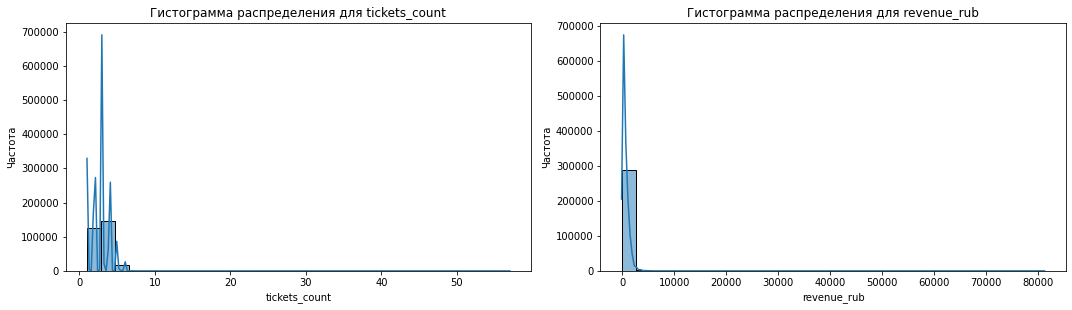

In [62]:
# Создаем гистограмму для каждого численного столбца
plt.figure(figsize=(15, 8))

# В этом цикле мы перебираем каждый элемент в списке numerical_columns с помощью функции enumerate(), которая возвращает
# индекс i и название текущего столбца. Создаем подграфики для каждого столбца.

for i, column in enumerate(numerical_columns):
    
    # Создаем сетку подграфиков. Размещаем гистограммы на одной фигуре.
    plt.subplot(2, 2, i + 1) 
    
    # Строим гистограммы. Параметр bins=30 задает количество интервалов для распределения данных. Параметр kde=True добавляет 
    # график оценки плотности ядра (KDE), который помогает визуализировать распределение данных более гладким образом.
    sns.histplot(df[column], bins=30, kde=True)
    
    # Добавляем заголовок к текущему подграфику, а также метки для осей X и Y. Метка оси X соответствует значению столбца, 
    # а оси Y — частоте (количеству наблюдений).
    plt.title(f'Гистограмма распределения для {column}')
    plt.xlabel(column)
    plt.ylabel('Частота')
    
# Автоматически настраиваем параметры подграфиков, чтобы избежать наложения элементов и сделать графики более читаемыми.
plt.tight_layout()

# Отображаем все созданные графики.
plt.show()

Данные сильно скошены вправо и содержат редкие, но очень большие значения (выбросы). Большинство записей имеет небольшое число билетов и небольшую выручку. Есть редкие наблюдения с большим tickets_count (примерно до 55) и большой revenue_rub (примерно до 80 000). Из‑за этих выбросов среднее будет вводить в заблуждение, лучше рассматривать медиану и квартили.
Данные не нормальны, доминируют значения с редкими крупными покупками.

In [63]:
# Выявим записи с отрицательным доходом. Отфильтруем данные, чтобы найти все записи, где revenue_rub меньше нуля.
negative_revenue = df[df['revenue_rub'] < 0]
display(negative_revenue)

,user_id,device_type_canonical,order_id,order_dt,order_ts,currency_code,revenue,tickets_count,days_since_prev,event_id,event_name,service_name,event_type_main,region_name,city_name,revenue_rub
252,00eb3dc9baa1543,mobile,1594653,2024-06-29,2024-06-29 15:01:43,rub,-2.37,3,0,538650,ffe03bc6-0e0c-480d-b037-6a4b55540ab5,Билеты без проблем,другое,Берёзовская область,Златопольск,-2.37
4539,02ea4583333f064,mobile,2360920,2024-09-03,2024-09-03 18:12:58,rub,-0.23,3,0,559772,592856bb-09a5-4d32-9534-0e02c6056e44,Билеты без проблем,другое,Широковская область,Лесореченск,-0.23
4544,02ea4583333f064,mobile,2361094,2024-09-04,2024-09-04 09:34:53,rub,-0.15,2,0,559772,592856bb-09a5-4d32-9534-0e02c6056e44,Билеты без проблем,другое,Широковская область,Лесореченск,-0.15
8135,043f669c9f734b1,mobile,166780,2024-09-27,2024-09-27 10:00:09,rub,-1.86,3,0,567183,9f571dad-b18a-4095-ac76-9db60d8dd97a,Лучшие билеты,другое,Золотоключевской край,Луговинец,-1.86
8136,043f669c9f734b1,mobile,166809,2024-09-27,2024-09-27 10:56:35,rub,-0.62,1,0,567183,9f571dad-b18a-4095-ac76-9db60d8dd97a,Лучшие билеты,другое,Золотоключевской край,Луговинец,-0.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288837,fe237d2cfd6e503,mobile,3700575,2024-10-12,2024-10-12 08:11:33,rub,-5.70,1,0,247058,a3214473-934e-44ad-a8da-82915f51583f,Тебе билет!,концерты,Речицкая область,Радужанов,-5.70
288910,fe237d2cfd6e503,desktop,3523617,2024-10-15,2024-10-15 20:13:13,rub,-0.96,2,0,243963,80f5f95b-9a58-401d-b888-4261335ae290,Лучшие билеты,другое,Ягодиновская область,Речинцево,-0.96
288911,fe237d2cfd6e503,desktop,3523646,2024-10-15,2024-10-15 20:32:18,rub,-1.43,3,0,243963,80f5f95b-9a58-401d-b888-4261335ae290,Лучшие билеты,другое,Ягодиновская область,Речинцево,-1.43
289058,fe237d2cfd6e503,mobile,5445853,2024-10-21,2024-10-21 20:22:29,rub,-0.61,1,0,243393,1f30acba-8b62-41c3-aaea-a80bf58d0d26,Лучшие билеты,другое,Ягодиновская область,Речинцево,-0.61


In [64]:
# Сортировуем по увеличению дохода
negative_revenue_sorted = negative_revenue.sort_values(by='revenue_rub', ascending=True)

# Отобразим отсортированные данные
display(negative_revenue_sorted)

,user_id,device_type_canonical,order_id,order_dt,order_ts,currency_code,revenue,tickets_count,days_since_prev,event_id,event_name,service_name,event_type_main,region_name,city_name,revenue_rub
226267,c02e67523e534d6,mobile,1740146,2024-10-29,2024-10-29 18:58:02,rub,-90.760002,5,0,570411,e118387a-3a7e-4932-a92c-e8dd5d234643,Билеты в руки,спорт,Медовская область,Радужсвет,-90.760002
85635,3ee7dc2e115847f,mobile,1599206,2024-09-19,2024-09-19 09:07:24,rub,-17.940001,5,1,568916,b1a3919a-5d3e-4da2-b6f5-eccb480d810c,Билеты в руки,другое,Малиновая область,Зеленополье,-17.940001
288819,fe237d2cfd6e503,mobile,6804329,2024-10-11,2024-10-11 10:49:27,rub,-10.770000,3,0,568916,b1a3919a-5d3e-4da2-b6f5-eccb480d810c,Билеты в руки,другое,Малиновая область,Зеленополье,-10.770000
119844,586f795f132bf46,mobile,2489390,2024-09-26,2024-09-26 09:42:57,rub,-10.770000,3,0,568916,b1a3919a-5d3e-4da2-b6f5-eccb480d810c,Билеты в руки,другое,Малиновая область,Зеленополье,-10.770000
227531,c1c7641fd348ed1,mobile,521537,2024-10-24,2024-10-24 09:04:00,rub,-10.770000,3,0,568916,b1a3919a-5d3e-4da2-b6f5-eccb480d810c,Билеты в руки,другое,Малиновая область,Зеленополье,-10.770000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165806,871a53e26a29e43,mobile,6914181,2024-09-02,2024-09-02 17:16:57,rub,-0.080000,1,0,559772,592856bb-09a5-4d32-9534-0e02c6056e44,Билеты без проблем,другое,Широковская область,Лесореченск,-0.080000
219429,b5d54ed6afc1e97,mobile,6542546,2024-10-07,2024-10-07 14:04:17,rub,-0.040000,3,4,569491,a9cf1fad-7cbb-4ae8-b275-eb7a76ac1a8f,Лови билет!,другое,Яблоневская область,Горяново,-0.040000
145661,77eba1002a839ca,mobile,4008700,2024-10-23,2024-10-23 09:43:17,rub,-0.030000,2,0,569491,a9cf1fad-7cbb-4ae8-b275-eb7a76ac1a8f,Лови билет!,другое,Яблоневская область,Горяново,-0.030000
219430,b5d54ed6afc1e97,mobile,6542517,2024-10-07,2024-10-07 14:19:54,rub,-0.030000,2,0,569491,a9cf1fad-7cbb-4ae8-b275-eb7a76ac1a8f,Лови билет!,другое,Яблоневская область,Горяново,-0.030000


Отрицательные значения до -90.76.  Изучим их более детально.

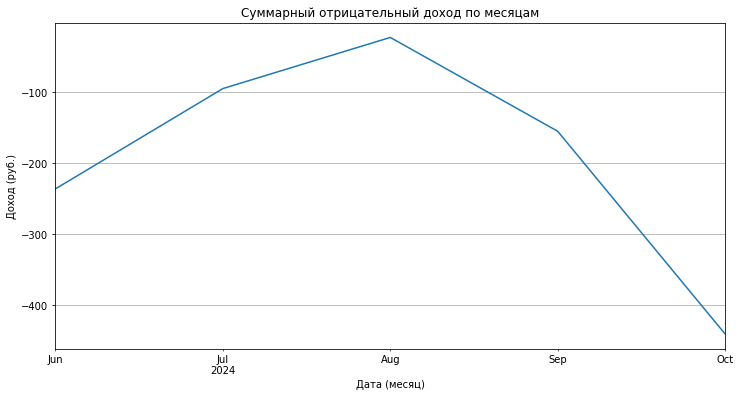

In [65]:
# Группируем данные по месяцам и суммируем доход
time_series = negative_revenue.resample('M', on='order_dt').sum()

# Строим график
# Задаем размеры для графика
plt.figure(figsize=(12, 6))
time_series['revenue_rub'].plot()

# Добавляем заголовок к графику
plt.title('Суммарный отрицательный доход по месяцам')

# Задаем подписи осей
plt.xlabel('Дата (месяц)')
plt.ylabel('Доход (руб.)')

# Добавляем сетку на график
plt.grid()

# Отображаем график
plt.show()


График показывает, что суммарный доход (отрицательный) сначала улучшался, а затем резко ухудшился, то есть с июня по август доход увеличивался (наибольшая выручка, приближенная к нулю, в августе); с августа по октябрь выручка снова уменьшается и особенно сильно это наблюдается в октябре.
В августе скорее всего временное улучшение (возможно, крупные покупки, сезонные мероприятия, меньше возвратов). В октябре есть серьёзная негативная причина и, возможно, не одна: возвраты, в том числе и по причине плохих погодных условий, и ошибки в данных. 

In [66]:
# Создаем копию датафрейма df для работы с ней
df_copy = df.copy()

# Добавляем новый столбец 'month' в df_copy
df_copy['month'] = df_copy['order_dt'].dt.to_period('M')

In [67]:
# Сводим данные по месяцам
monthly = df_copy.groupby('month').agg(
    total_rev=('revenue_rub', 'sum'),
    pos_sum=('revenue_rub', lambda x: x[x > 0].sum()),
    neg_sum=('revenue_rub', lambda x: x[x < 0].sum()),
    total_cnt=('revenue_rub', 'count'),
    neg_cnt=('revenue_rub', lambda x: (x < 0).sum())
).reset_index()


# Выводим сводки по месяцам
display("Сводка по месяцам:")
display(monthly)

'Сводка по месяцам:'

,month,total_rev,pos_sum,neg_sum,total_cnt,neg_cnt
0,2024-06,21737936.0,21738174.0,-236.149979,34497,108.0
1,2024-07,24166876.0,24166972.0,-94.939995,40913,46.0
2,2024-08,26749828.0,26749852.0,-22.920002,45004,19.0
3,2024-09,36456012.0,36456168.0,-155.049988,69960,88.0
4,2024-10,52326164.0,52326608.0,-440.529999,100191,120.0


Наибольший отрицательный доход наблюдается в октябре месяце.

In [68]:
# Формируем топ крупных отрицательных транзакций
top_negative_transactions = df_copy[df_copy['revenue_rub'] < 0].sort_values('revenue_rub').head(20)

# Выводим топ отрицательных транзакций
display("\nТоп крупных отрицательных транзакций:")
display(top_negative_transactions)

'\nТоп крупных отрицательных транзакций:'

,user_id,device_type_canonical,order_id,order_dt,order_ts,currency_code,revenue,tickets_count,days_since_prev,event_id,event_name,service_name,event_type_main,region_name,city_name,revenue_rub,month
226267,c02e67523e534d6,mobile,1740146,2024-10-29,2024-10-29 18:58:02,rub,-90.760002,5,0,570411,e118387a-3a7e-4932-a92c-e8dd5d234643,Билеты в руки,спорт,Медовская область,Радужсвет,-90.760002,2024-10
85635,3ee7dc2e115847f,mobile,1599206,2024-09-19,2024-09-19 09:07:24,rub,-17.940001,5,1,568916,b1a3919a-5d3e-4da2-b6f5-eccb480d810c,Билеты в руки,другое,Малиновая область,Зеленополье,-17.940001,2024-09
288819,fe237d2cfd6e503,mobile,6804329,2024-10-11,2024-10-11 10:49:27,rub,-10.770000,3,0,568916,b1a3919a-5d3e-4da2-b6f5-eccb480d810c,Билеты в руки,другое,Малиновая область,Зеленополье,-10.770000,2024-10
119844,586f795f132bf46,mobile,2489390,2024-09-26,2024-09-26 09:42:57,rub,-10.770000,3,0,568916,b1a3919a-5d3e-4da2-b6f5-eccb480d810c,Билеты в руки,другое,Малиновая область,Зеленополье,-10.770000,2024-09
227531,c1c7641fd348ed1,mobile,521537,2024-10-24,2024-10-24 09:04:00,rub,-10.770000,3,0,568916,b1a3919a-5d3e-4da2-b6f5-eccb480d810c,Билеты в руки,другое,Малиновая область,Зеленополье,-10.770000,2024-10
11622,067494310c6617f,mobile,8350029,2024-10-24,2024-10-24 17:46:44,rub,-10.770000,3,0,568916,b1a3919a-5d3e-4da2-b6f5-eccb480d810c,Билеты в руки,другое,Малиновая область,Зеленополье,-10.770000,2024-10
119842,586f795f132bf46,mobile,2489419,2024-09-26,2024-09-26 09:41:31,rub,-10.770000,3,7,568916,b1a3919a-5d3e-4da2-b6f5-eccb480d810c,Билеты в руки,другое,Малиновая область,Зеленополье,-10.770000,2024-09
175955,8f345256ea7d49b,mobile,2606608,2024-10-26,2024-10-26 22:31:41,rub,-10.770000,3,0,568916,b1a3919a-5d3e-4da2-b6f5-eccb480d810c,Билеты в руки,другое,Малиновая область,Зеленополье,-10.770000,2024-10
86589,3ee7dc2e115847f,mobile,7042796,2024-10-15,2024-10-15 15:19:45,rub,-10.770000,3,0,568916,b1a3919a-5d3e-4da2-b6f5-eccb480d810c,Билеты в руки,другое,Малиновая область,Зеленополье,-10.770000,2024-10
24587,0beb8fc0c0a9ce1,desktop,5316252,2024-10-29,2024-10-29 15:24:53,rub,-8.530000,4,0,421128,108f6faf-1363-40f8-953e-664e51a7e858,Лови билет!,спорт,Североярская область,Озёрск,-8.530000,2024-10


Практически все крупные транзакции с отрицательными значениями приходятся на октябрь месяц, осуществлены одним и тем же билетным оператором "Билеты в руки", относятся в категории "другое", представлены Малиновой областью и городом Зеленополье. Вероятнее всего это возвраты. Но тем не менее при незначительных отрицательных данных имеют место быть и ошибки в данных. 

In [69]:
# Группируем отрицательные значения по event_type_main и подсчитываем количество и среднее значение revenue_rub
grouped_negative_revenue = negative_revenue.groupby('event_type_main').agg(
    count=('revenue_rub', 'size'),  # Количество записей
    average_revenue=('revenue_rub', 'mean')  # Средний доход
).reset_index()

# Отобразим результаты
display(grouped_negative_revenue)

,event_type_main,count,average_revenue
0,выставки,43,-2.761860
1,другое,315,-2.186286
2,концерты,1,-5.700000
3,спорт,22,-6.202273
4,стендап,0,NaN
5,театр,0,NaN
6,ёлки,0,NaN


Выше приведенная группировка свидетельствует о том, что больше всего отрицательных значений по количеству в категории "другое", а по среднему доходу в категории "спорт". Это говорит об ошибках в данных и возвратах.

В нашем случае целесообразно удалить все отрицательные значения по полю "revenue_rub". Удаление отрицательных значений поможет сделать нам датафрейм более чистым и упростит дальнейший анализ. Это позволит сосредоточиться на положительных значениях, которые отражают реальную выручку.

In [70]:
# Удаляем строки, где значения в столбце 'revenue_rub' отрицательные
df = df[df['revenue_rub'] >= 0]

# Сбрасываем индексы после удаления
df.reset_index(drop=True, inplace=True)

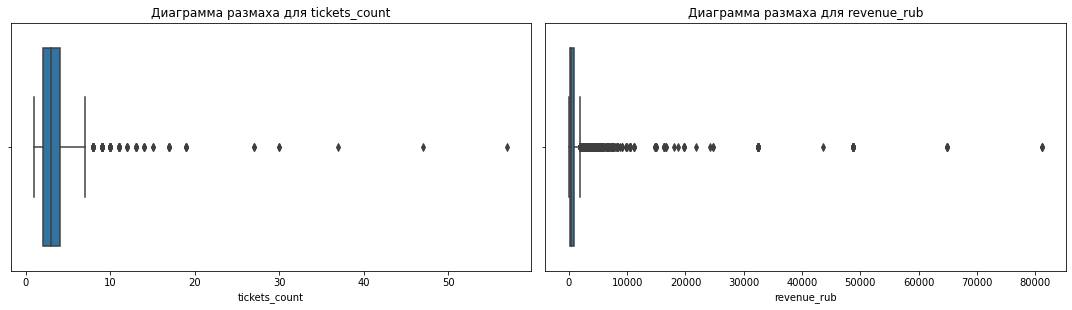

In [71]:
# Настроим графики
plt.figure(figsize=(15, 8))

# Создаем диаграммы размаха для каждого численного столбца. Функция enumerate возвращает индекс i и значение column для каждого
# элемента в списке. 
for i, column in enumerate(numerical_columns):
    
# Создаем сетку подграфиков, состоящую из 2 строк и 2 столбцов (всего 4 подграфика).     
    plt.subplot(2, 2, i + 1)
    
    # Строим диаграммы размаха. Параметр x указывает на данные, которые будут использованы для построения графика. 
    sns.boxplot(x=df[column])
    
    # Задаем заголовок для текущего подграфика. 
    plt.title(f'Диаграмма размаха для {column}')
    
    # Задаем подпись для оси X текущего подграфика. 
    plt.xlabel(column)
    
# Автоматически настраиваем параметры подграфиков так, чтобы они не перекрывали друг друга и были равномерно распределены 
plt.tight_layout()

# Отображаем все созданные диаграммы
plt.show()

На графиках видна сильняя правосторонняя скошенность и большое количество выбросов. Медианы смещены к малым значениям, а «усы» и множество точек справа показывают длинный правый хвост, то есть небольшая часть наблюдений имеет гораздо больше билетов / дохода, чем большинство. Межквартильный размах относительно мал по сравнению с диапазоном значений, поэтому среднее и распределение чувствительны к редким большими наблюдениям. Вероятно, часть этих «выбросов» — реальные крупные значения (дорогие билеты).

На диаграмме размаха для поля 'revenue_rub' отсутствуют отрицательные выбросы, собственно, что не удивительно, так как мы удалили отрицательные значения данного поля. Но при выявлении выбросов с использованием IQR мы можем столкнуться с проблемой, когда нижняя граница выбросов по методу межквартильного размаха (IQR) окажется отрицательной, и это не соответствует нашим данным, мы можем установить нижнюю границу равной нулю, если она будет меньше нуля. 

In [72]:
# Выявляем выбросы с использованием IQR
for column in numerical_columns:
    Q1 = df[column].quantile(0.25)  # значение, ниже которого находится 25% наблюдений в данном столбце
    Q3 = df[column].quantile(0.75)  # значение, ниже которого находится 75% наблюдений
    IQR = Q3 - Q1                   # межквартильный размах. Он показывает диапазон, в котором находятся средние 50% данных.
    
    # Нижняя граница, ниже которой значения считаются выбросами.
    lower_bound = Q1 - 1.5 * IQR 
    # Устанавливаем нижнюю границу равной нулю, если она меньше нуля
    if lower_bound < 0:
        lower_bound = 0
    
    # Верхняя граница, выше которой значения считаются выбросами.
    upper_bound = Q3 + 1.5 * IQR
    
    # Выводим информацию о границах
    display(f"{column}:")
    display(f"Нижняя граница: {lower_bound}, Верхняя граница: {upper_bound}")
    
    # Выявляем выбросы
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    display(f"Количество выбросов: {outliers.shape[0]}\n")


'tickets_count:'

'Нижняя граница: 0, Верхняя граница: 7.0'

'Количество выбросов: 126\n'

'revenue_rub:'

'Нижняя граница: 0, Верхняя граница: 1833.7099990844727'

'Количество выбросов: 10451\n'

Для tickets_count
Нижняя граница для tickets_count равна 0, что указывает на отсутствие отрицательных значений в этом столбце. В контексте "количества билетов" установка нижней границы на ноль также позволяет избежать потери информации о нулевых значениях.
126 выбросов из общего количества наблюдений могут свидетельствовать о том, что в данных есть аномалии, которые стоит исследовать. Возможно, это записи с ошибками или случаи, когда количество билетов было неверно зафиксировано или групповые заказы.
Верхняя граница 7 также указывает на то, что большинство записей находятся в пределах от 0 до 7 билетов.
Для revenue_rub
Нижняя граница также показывает 0, что указывает на отсутствие записей с отрицательной выручкой, причиной формирования которой являются возвраты и  ошибки.
Верхняя граница дохода в 1833.71 рублей может говорить о том, что большинство записей имеют доход в пределах от 0 до 1833.71 рублей. 10451 выброс — это значительная часть данных, что может указывать на проблемы с качеством данных или на то, что в данных присутствует множество аномальных значений. Это может затруднить анализ и привести к неправильным выводам, поэтому нам необходимо отфильтровать значения по 99 перцентилю. 

In [73]:
# Вычисляем 99-й перцентиль
percentile_99 = df['revenue_rub'].quantile(0.99)

In [74]:
# Фильтруем данные, оставляя только те строки, где revenue_rub меньше или равно 99-му перцентилю
filtered_df = df[df['revenue_rub'] <= percentile_99]

In [75]:
# Выводим информацию о размере исходного и отфильтрованного датафрейма
display(f"Исходный размер данных: {df.shape[0]}")
display(f"Размер данных после фильтрации: {filtered_df.shape[0]}")

'Исходный размер данных: 290184'

'Размер данных после фильтрации: 287359'

In [76]:
# Проверим сколько удалено строк датафрема
a, b = len(temp), len(filtered_df)
deleted_rows = a - b
loss_percentage = round(deleted_rows / a * 100, 2)

# Выводим результаты
display(f"Было строк в исходном датафрейме: {a}")
display(f"Осталось строк в датафрейме после обработки: {b}")
display(f"Удалено строк в датафрейме после обработки: {deleted_rows}")
display(f"Процент потерь: {loss_percentage}")

'Было строк в исходном датафрейме: 290611'

'Осталось строк в датафрейме после обработки: 287359'

'Удалено строк в датафрейме после обработки: 3252'

'Процент потерь: 1.12'

In [77]:
# Выводим информацию о датафрейме  df после преобразований: 
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 287359 entries, 0 to 290183
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   user_id                287359 non-null  object        
 1   device_type_canonical  287359 non-null  category      
 2   order_id               287359 non-null  int32         
 3   order_dt               287359 non-null  datetime64[ns]
 4   order_ts               287359 non-null  datetime64[ns]
 5   currency_code          287359 non-null  object        
 6   revenue                287359 non-null  float32       
 7   tickets_count          287359 non-null  int8          
 8   days_since_prev        287359 non-null  int16         
 9   event_id               287359 non-null  int32         
 10  event_name             287359 non-null  object        
 11  service_name           287359 non-null  object        
 12  event_type_main        287359 non-null  cate

#### промежуточный вывод по второму разделу

   Данные о выручке сервиса были представлены в российских рублях и казахстанских тенге. Используя датасет с информацией о курсе казахстанского тенге по отношению к российскому рублю за 2024 год, выручка в казахстанских тенге была переведена в российские рубли, в результате чего в датафрейм добавлен новый столбец revenue_rub. Теперь датафрейм df содержит 16 столбцов и 290611 строк. Объем занимаемой памяти составляет 35.5 MB.
   Выгрузка из SQL была успешной, поэтому пропуски только в столбце days_since_prev (21933 пропуска, что составляет 7.6%). Так как пропуски свидетельствуют о совершении пользоватеями одной покупки мы заменили их на 0. Типы данных откорректированы: столбцы  `device_type_canonical` (фиксированный набор уникальных типов) и `event_type_main` приведены к типу данных  `category`; тип данных в столбце 'days_since_prev' приведен к `int`. Разрядность отдельных столбцов (`order_id`, `tickets_count', 'days_since_prev', 'event_id`, `revenue', 'revenue_rub`) понижена. В столбце `order_dt` обнулили время и оставили только дату. В столбце `order_ts` убрали наносекунды. Изучение значений ключевых столбцов не выявило наличие номинальных значений ('unknown' или 'не указано') и пустых строк. Однако, среди типов мероприятий выявлена категория "другое", что говорит о том, что некоторые мероприятия не категоризированы. Явные дубликаты в датафрейме отсутвуют. При это обнаружено 46 неявных дубликатов (0.02%), которые удалены.  В ходе анализа было выявлено, что количество билетов при всей своей вариативности относительно однородно, тогда как выручка имеет значительные колебания.
По результатам анализа было принято решение - удалить отрицательные значения в revenue_rub (возвраты, ошибки в данных), что поможет сделать нам датафрейм более чистым и упростит дальнейший анализ. Так же это позволит сосредоточиться на положительных значениях, которые отражают реальную выручку. Так же в связи с обнаружением выбросов  в поле revenue_rub, мы отфильтровали значения по 99 перцентилю. 
После проведенных преобразований датафрейма общее количество памяти, используемой нашим датафреймом, уменьшилось на 10.0 MB и составило 25.5 MB.  Это может помочь нам в оптимизации использования памяти. Теперь датафрейм содержит 16 столбцов и 287359 строк.

---

### профиль пользователя

В будущем отдел маркетинга планирует создать модель для прогнозирования возврата пользователей. Поэтому сейчас они просят вас построить агрегированные признаки, описывающие поведение и профиль каждого пользователя.

---

#### создание профиля пользователя

**Задача 3.1**
 Постройте профиль пользователя — для каждого пользователя найдите:

- дату первого и последнего заказа;
- устройство, с которого был сделан первый заказ;
- регион, в котором был сделан первый заказ;
- билетного партнёра, к которому обращались при первом заказе;
- жанр первого посещённого мероприятия (используйте поле `event_type_main`);
- общее количество заказов;
- средняя выручка с одного заказа в рублях;
- среднее количество билетов в заказе;
- среднее время между заказами.

После этого добавьте два бинарных признака:

- `is_two` — совершил ли пользователь 2 и более заказа;
- `is_five` — совершил ли пользователь 5 и более заказов.

**Рекомендация:** перед тем как строить профиль, отсортируйте данные по времени совершения заказа.

---


In [78]:
# Сортируем данные по времени совершения заказа и создаем новый датафрейм
sorted_df = filtered_df.sort_values(by='order_dt')

# Группируем данные по user_id
user_profile = sorted_df.groupby('user_id').agg(
    first_order_date=('order_dt', 'first'),
    last_order_date=('order_dt', 'last'),
    first_device_type=('device_type_canonical', 'first'),
    first_region=('region_name', 'first'),
    first_service_name=('service_name', 'first'),
    first_event_type=('event_type_main', 'first'),
    total_orders=('order_id', 'count'),
    average_revenue=('revenue_rub', 'mean'),
    average_tickets=('tickets_count', 'mean'),
    average_days_between_orders=('days_since_prev', 'mean')
).reset_index()

# Выводим получившийся профиль пользователя
display(user_profile)

,user_id,first_order_date,last_order_date,first_device_type,first_region,first_service_name,first_event_type,total_orders,average_revenue,average_tickets,average_days_between_orders
0,0002849b70a3ce2,2024-08-20,2024-08-20,mobile,Каменевский регион,Край билетов,театр,1,1521.939941,4.000000,0.000000
1,0005ca5e93f2cf4,2024-07-23,2024-10-06,mobile,Каменевский регион,Мой билет,выставки,2,774.010010,3.000000,37.500000
2,000898990054619,2024-07-13,2024-10-23,mobile,Североярская область,Лови билет!,другое,3,767.213318,2.666667,34.000000
3,00096d1f542ab2b,2024-08-15,2024-08-15,desktop,Каменевский регион,Край билетов,театр,1,917.830017,4.000000,0.000000
4,000a55a418c128c,2024-09-29,2024-10-15,mobile,Поленовский край,Лучшие билеты,театр,2,61.309998,1.500000,8.000000
...,...,...,...,...,...,...,...,...,...,...,...
21833,fff13b79bd47d7c,2024-07-16,2024-10-31,mobile,Каменевский регион,Мой билет,другое,9,688.043335,2.555556,11.888889
21834,fff32fc9ad0f9f6,2024-08-15,2024-10-28,desktop,Каменевский регион,Билеты без проблем,стендап,2,850.994995,2.500000,37.000000
21835,fffcd3dde79eb2c,2024-06-20,2024-10-30,desktop,Каменевский регион,Билеты без проблем,концерты,33,557.908508,2.787879,4.000000
21836,fffeeb3c120cf0b,2024-09-24,2024-09-24,desktop,Широковская область,Билеты без проблем,стендап,1,661.530029,2.000000,0.000000


In [79]:
# Добавляем бинарные признаки is_two и is_five в ваш DataFrame user_profile, используя условные выражения. Эти признаки
# будут равны 1, если пользователь совершил 2 или более заказов (для is_two) и 5 или более заказов (для is_five), и 0 
# в противном случае.

user_profile['is_two'] = (user_profile['total_orders'] >= 2).astype(int)
user_profile['is_five'] = (user_profile['total_orders'] >= 5).astype(int)

# Выводим обновленный профиль пользователя
display(user_profile)

,user_id,first_order_date,last_order_date,first_device_type,first_region,first_service_name,first_event_type,total_orders,average_revenue,average_tickets,average_days_between_orders,is_two,is_five
0,0002849b70a3ce2,2024-08-20,2024-08-20,mobile,Каменевский регион,Край билетов,театр,1,1521.939941,4.000000,0.000000,0,0
1,0005ca5e93f2cf4,2024-07-23,2024-10-06,mobile,Каменевский регион,Мой билет,выставки,2,774.010010,3.000000,37.500000,1,0
2,000898990054619,2024-07-13,2024-10-23,mobile,Североярская область,Лови билет!,другое,3,767.213318,2.666667,34.000000,1,0
3,00096d1f542ab2b,2024-08-15,2024-08-15,desktop,Каменевский регион,Край билетов,театр,1,917.830017,4.000000,0.000000,0,0
4,000a55a418c128c,2024-09-29,2024-10-15,mobile,Поленовский край,Лучшие билеты,театр,2,61.309998,1.500000,8.000000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21833,fff13b79bd47d7c,2024-07-16,2024-10-31,mobile,Каменевский регион,Мой билет,другое,9,688.043335,2.555556,11.888889,1,1
21834,fff32fc9ad0f9f6,2024-08-15,2024-10-28,desktop,Каменевский регион,Билеты без проблем,стендап,2,850.994995,2.500000,37.000000,1,0
21835,fffcd3dde79eb2c,2024-06-20,2024-10-30,desktop,Каменевский регион,Билеты без проблем,концерты,33,557.908508,2.787879,4.000000,1,1
21836,fffeeb3c120cf0b,2024-09-24,2024-09-24,desktop,Широковская область,Билеты без проблем,стендап,1,661.530029,2.000000,0.000000,0,0


In [80]:
# Выводим информацию о профиле пользователя
user_profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21838 entries, 0 to 21837
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   user_id                      21838 non-null  object        
 1   first_order_date             21838 non-null  datetime64[ns]
 2   last_order_date              21838 non-null  datetime64[ns]
 3   first_device_type            21838 non-null  object        
 4   first_region                 21838 non-null  object        
 5   first_service_name           21838 non-null  object        
 6   first_event_type             21838 non-null  object        
 7   total_orders                 21838 non-null  int64         
 8   average_revenue              21838 non-null  float32       
 9   average_tickets              21838 non-null  float64       
 10  average_days_between_orders  21838 non-null  float64       
 11  is_two                       21838 non-nu

Полученнй нами профиль пользователя 'user_profile' содержит 13 столбцов и 21838 строк. Объем занимаемой памяти составляет 2.1 MB.

---

#### изучение данных о профилях пользователей


**Задача 3.2**
 Прежде чем проводить исследовательский анализ данных и делать выводы, важно понять, с какими данными вы работаете: насколько они репрезентативны и нет ли в них аномалий.

Используя данные о профилях пользователей, рассчитайте:

- общее число пользователей в выборке;
- среднюю выручку с одного заказа;
- долю пользователей, совершивших 2 и более заказа;
- долю пользователей, совершивших 5 и более заказов.

Также изучите статистические показатели:

- по общему числу заказов;
- по среднему числу билетов в заказе;
- по среднему количеству дней между покупками.

По результатам оцените данные: достаточно ли их по объёму, есть ли аномальные значения в данных о количестве заказов и среднем количестве билетов?

Если вы найдёте аномальные значения, опишите их и примите обоснованное решение о том, как с ними поступить:

- Оставить и учитывать их при анализе?
- Отфильтровать данные по какому-то значению, например, по 95-му или 99-му перцентилю?

Если вы проведёте фильтрацию, то вычислите объём отфильтрованных данных и выведите статистические показатели по обновлённому датасету.

In [81]:
# Общее число пользователей в выборке
total_users = user_profile.shape[0]

# Средняя выручка с одного заказа
average_revenue_per_order = user_profile['average_revenue'].mean()

# Доля пользователей, совершивших 2 и более заказа
users_with_two_or_more_orders = user_profile[user_profile['is_two'] == 1].shape[0]
proportion_users_with_two_or_more_orders = users_with_two_or_more_orders / total_users

# Доля пользователей, совершивших 5 и более заказов
users_with_five_or_more_orders = user_profile[user_profile['is_five'] == 1].shape[0]
proportion_users_with_five_or_more_orders = users_with_five_or_more_orders / total_users

# Выводим результаты
display(f"Общее число пользователей: {total_users}")
display(f"Средняя выручка с одного заказа: {average_revenue_per_order:.2f} руб.")
display(f"Доля пользователей, совершивших 2 и более заказов: {proportion_users_with_two_or_more_orders:.2%}")
display(f"Доля пользователей, совершивших 5 и более заказов: {proportion_users_with_five_or_more_orders:.2%}")

'Общее число пользователей: 21838'

'Средняя выручка с одного заказа: 545.03 руб.'

'Доля пользователей, совершивших 2 и более заказов: 61.70%'

'Доля пользователей, совершивших 5 и более заказов: 28.99%'

Доля пользователей, совершивших 2 и более заказов, составила 61.70%. Более половины пользователей (более 60%) делают повторные заказы, что говорит о том, что Яндекс Афиша имеет стабильную клиентскую базу и успешные стратегии удержания клиентов. Это также может свидетельствовать о качестве предоставляемых услуг. 
Доля пользователей, совершивших 5 и более заказов, составила 28.99%. Более четверти пользователей делает 5 и более заказов, что указывает на наличие лояльных клиентов. Это может быть положительным знаком для Яндекс Афиши, поскольку лояльные клиенты чаще других могут рекомендовать компанию другим. Однако, доля этих пользователей ниже чем доля пользователей совершивших 2 и более заказа.
Яндекс Афиша демонстрирует положительные показатели: значительное количество пользователей, высокая средняя выручка с заказа и хорошая доля повторных покупок. Это свидетельствует о том, что продукт или услуга востребованы, а также о наличии эффективных стратегий по удержанию клиентов. Для дальнейшего роста стоит продолжать работу над увеличением числа повторных заказов и привлечение новых клиентов.

In [82]:
# Список численных столбцов
numerical_columns = [
    'total_orders',
    'average_tickets', 'average_days_between_orders'
]

In [83]:
# Получение статистических показателей для численных данных
statistics = user_profile[numerical_columns].describe()
display(statistics)

,total_orders,average_tickets,average_days_between_orders
count,21838.000000,21838.000000,21838.000000
mean,13.158668,2.744063,6.556923
std,121.560563,0.913068,11.121605
min,1.000000,1.000000,0.000000
25%,1.000000,2.000000,0.000000
50%,2.000000,2.750000,0.000000
75%,5.000000,3.080000,9.428571
max,10168.000000,11.000000,137.000000


**Общее количество заказов (total_orders)**
   Среднее количество заказов на пользователя составляет примерно 13.16, что может указывать на то, что большинство пользователей делают несколько покупок. Высокое значение стандартного отклонения (121.56) говорит о том, что есть значительное разнообразие в количестве заказов среди пользователей. Это может означать, что есть небольшая группа пользователей, которая делает очень много заказов, в то время как большинство пользователей заказывают гораздо меньше. Минимальное значение 1 и максимальное 10168 показывают, что некоторые пользователи могут быть очень активными или лояльными к приобретению билетов.

**Среднее количество билетов в заказе (average_tickets)**
   В среднем в заказе содержится около 2.74 билета, что может указывать на то, что пользователи часто покупают несколько билетов за один раз. Стандартное отклонение (0.91) относительно невелико, что говорит о том, что большинство пользователей покупают примерно одинаковое количество билетов в заказе. Минимальное значение 1 и максимальное 11 показывают, что хотя большинство пользователей покупает около 2-3 билетов, некоторые могут делать более крупные заказы.

**Среднее время между заказами (average_days_between_orders)**
   Среднее время между заказами составляет около 6.56 дней, что указывает на достаточно частые покупки среди пользователей. Стандартное отклонение (11.12) говорит о том, что есть значительное разнообразие в интервалах времени между покупками, некоторые пользователи могут делать заказы очень часто, в то время как другие могут делать это реже. Минимальное значение 0 дней (что может указывать на то, что некоторые пользователи делают заказы один за другим) и максимальное значение 137 дней показывают, что есть пользователи, которые делают заказы с большим временным интервалом.

Существует значительное разнообразие в поведении пользователей: некоторые из них делают много заказов и часто, в то время как другие могут быть менее активными. Важно учитывать, что высокие значения по количеству заказов могут быть вызваны несколькими "активными" пользователями, которые значительно увеличивают средние показатели. Средние значения по количеству билетов и времени между заказами показывают, что пользователи склонны делать несколько покупок и возвращаться через короткие промежутки времени. 

 Чтобы исключить из анализа выбросы для total_orders применим фильтрацию данных по 95-му перцентилю.

In [84]:
# Вычисляем 95-й перцентиль
percentile_95 = user_profile['total_orders'].quantile(0.95)

# Фильтруем данные по 95-му перцентилю
filtered_user_profile = user_profile[user_profile['total_orders'] <= percentile_95]

# Выводим статистику по отфильтрованному датасету
filtered_statistics = filtered_user_profile[['total_orders', 'average_tickets', 'average_days_between_orders']].describe()
display(filtered_statistics)

,total_orders,average_tickets,average_days_between_orders
count,20747.000000,20747.000000,20747.000000
mean,4.048682,2.744538,6.790477
std,5.113080,0.934506,11.358813
min,1.000000,1.000000,0.000000
25%,1.000000,2.000000,0.000000
50%,2.000000,2.750000,0.000000
75%,5.000000,3.153846,10.000000
max,31.000000,11.000000,137.000000


**Общее количество заказов (total_orders)**
   Среднее количество заказов на пользователя составляет примерно 4.0, что может указывать на то, что большинство пользователей делают несколько покупок. Значение стандартного отклонения (5.1) значительно стабилизировалось после проведенной фильтрации. Уже наблюдается нормальная вариативность в количестве заказов среди пользователей. Минимальное значение 1 и максимальное 31 показывают, что некоторые пользователи могут быть очень активными или лояльными к приобретению билетов.

**Среднее количество билетов в заказе (average_tickets)**
   В среднем в заказе содержится около 2.74 билета, что может указывать на то, что пользователи часто покупают несколько билетов за один раз. Стандартное отклонение (0.93) относительно невелико, что говорит о том, что большинство пользователей покупают примерно одинаковое количество билетов в заказе. Минимальное значение 1 и максимальное 11 показывают, что хотя большинство пользователей покупает около 2-3 билетов, некоторые могут делать более крупные заказы.

**Среднее время между заказами (average_days_between_orders)**
   Среднее время между заказами составляет около 6.79 дней, что указывает на достаточно частые покупки среди пользователей. Стандартное отклонение (11.36) говорит о том, что есть значительное разнообразие в интервалах времени между покупками, некоторые пользователи могут делать заказы очень часто, в то время как другие могут делать это реже. Минимальное значение 0 дней (что может указывать на то, что некоторые пользователи делают заказы один за другим) и максимальное значение 137 дней показывают, что есть пользователи, которые делают заказы с большим временным интервалом.

Некоторые покупатели делают много заказов и часто, в то время как другие могут быть менее активными. Средние значения по количеству билетов и времени между заказами показывают, что пользователи склонны делать несколько покупок и возвращаться через короткие промежутки времени. В целом после проведенной фильтрации экстремально высокие выбросы отсутствуют.

In [85]:
# Проверим сколько строк датасета удалено 
a, b = len(user_profile), len(filtered_user_profile)
deleted_rows = a - b
loss_percentage = round(deleted_rows / a * 100, 2)

# Выводим результаты
display(f"Было строк в профиле пользователей: {a}")
display(f"Осталось строк в датафрейме после обработки: {b}")
display(f"Удалено строк в датафрейме после обработки: {deleted_rows}")
display(f"Процент потерь: {loss_percentage}")

'Было строк в профиле пользователей: 21838'

'Осталось строк в датафрейме после обработки: 20747'

'Удалено строк в датафрейме после обработки: 1091'

'Процент потерь: 5.0'

Создадим диаграммы размаха, выявим выбросы с использованием IQR.

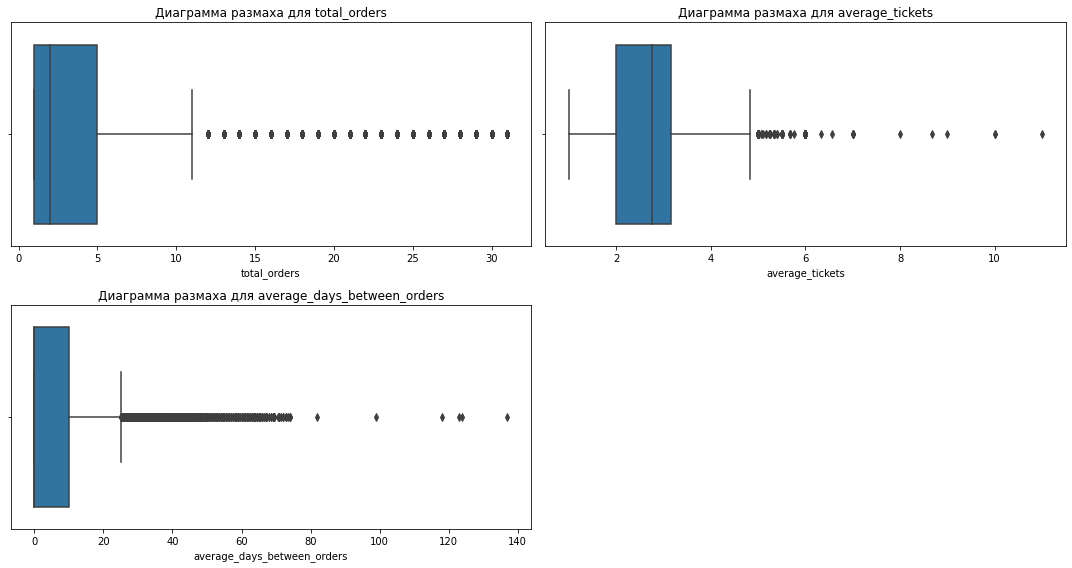

In [86]:
# Настроим графики
plt.figure(figsize=(15, 8))

# Создаем диаграммы размаха для каждого численного столбца
# Этот цикл проходит по всем элементам списка numerical_columns, который должен содержать названия численных столбцов 
# нашего датафрейма filtered_user_profile. 
for i, column in enumerate(numerical_columns):
    
# Создаем сетку подграфиков, состоящую из 2 строк и 2 столбцов (всего 4 подграфика). Параметры (2, 2, i + 1)
# указывают на то, что мы хотим разместить текущий график в позиции i + 1 (индексация начинается с 1). Это означает, что 
# первый график будет в позиции (1, 1), второй — в (1, 2), третий — во (2, 1) и четвертый — в (2, 2).    
    plt.subplot(2, 2, i + 1)
    
    # Строим диаграммы размаха. Параметр x указывает на данные, которые будут использованы для построения графика. 
    # В данном случае это значения из столбца column датафрейма filtered_user_profile.
    sns.boxplot(x=filtered_user_profile[column])
    
    # Задаем заголовок для текущего подграфика. 
    plt.title(f'Диаграмма размаха для {column}')
    
    # Задаем подпись для оси X текущего подграфика. 
    plt.xlabel(column)
    
# Автоматически настраиваем параметры подграфиков так, чтобы они не перекрывали друг друга и были равномерно 
# распределены
plt.tight_layout()

# Оnображаем все созданные графики.
plt.show()

Все три диаграммы с положительной скошенностью и наличием правых выбросов, но их гораздо меньше чем до фильтрации.
Большинство клиентов делает мало заказов (ящик сосредоточен в низких значениях), есть длинный хвост «частых» покупателей — много правых выбросов до 20–30 заказов. Основная часть среднего чека лежит в небольшой зоне (2–4), но есть отдельные высокие значения (выбросы) — редкие крупные по сумме покупки.Большинство клиентов покупает с относительно небольшим интервалом, но встречаются пользователи с очень большими интервалами между покупками (много выбросов).
Данные несимметричны, характерна «длинная хвостовая» структура: небольшая база лояльных/частых покупателей и большая доля малоактивных/редких. Выбросы, вероятно, реальны и отражают разные поведенческие сегменты, а не только ошибки измерения.
Усреднённые/медианные значения (центры ящиков) дают лучшее представление о типичном клиенте, чем среднее арифметическое из‑за скошенности.

In [87]:
# Выявление выбросов с использованием IQR
for column in numerical_columns:
    Q1 = user_profile[column].quantile(0.25)  # значение, ниже которого находится 25% наблюдений в данном столбце
    Q3 = user_profile[column].quantile(0.75)  # значение, ниже которого находится 75% наблюдений
    IQR = Q3 - Q1                   # межквартильный размах. Он показывает диапазон, в котором находятся средние 50% данных.
    
    # Нижняя граница, ниже которой значения считаются выбросами.
    lower_bound = Q1 - 1.5 * IQR 
    # Устанавливаем нижнюю границу равной нулю, если она меньше нуля
    if lower_bound < 0:
        lower_bound = 0
    
    # Верхняя граница, выше которой значения считаются выбросами.
    upper_bound = Q3 + 1.5 * IQR
    
    # Выводим информацию о границах
    display(f"{column}:")
    display(f"Нижняя граница: {lower_bound}, Верхняя граница: {upper_bound}")
    
    # Выявляем выбросы
    outliers = user_profile[(user_profile[column] < lower_bound) | (user_profile[column] > upper_bound)]
    display(f"Количество выбросов: {outliers.shape[0]}\n")


'total_orders:'

'Нижняя граница: 0, Верхняя граница: 11.0'

'Количество выбросов: 2761\n'

'average_tickets:'

'Нижняя граница: 0.3799999999999999, Верхняя граница: 4.7'

'Количество выбросов: 682\n'

'average_days_between_orders:'

'Нижняя граница: 0, Верхняя граница: 23.57142857142857'

'Количество выбросов: 1779\n'

**total_orders**
 Значения общего количества заказов варьируются от 0 до 11, что указывает на отсутствие отрицательных значений. Высокое количество выбросов (2761) говорит о том, что данные неоднородны.

**average_tickets**
   Среднее количество билетов в заказе имеет разумные положительные значения, но наличие выбросов может указывать на наличие аномально низких или высоких значений, которые могут не отражать реальную картину. Это может быть связано с акциями, скидками.

**average_days_between_orders**
  Высокое количество выбросов также предполагает, что наряду с лояльными покупателями есть малоактивные.

#### промежуточный вывод по третьему разделу



   Для отдела маркетинга, планирующего создать модель для прогнозирования возврата пользователей, мы создали профили пользователей, включающие агрегированные признаки, описывающие поведение и профиль каждого пользователя. Полученнй нами профиль пользователя 'user_profile' содержит 13 столбцов и 21838 строк. Объем занимаемой памяти составляет 2.1 MB.
   Доля пользователей, совершивших 2 и более заказов, составила 61.70%. Более половины пользователей (более 60%) делают повторные заказы, что говорит о том, что Яндекс Афиша имеет стабильную клиентскую базу и успешные стратегии удержания клиентов. Это также может свидетельствовать о качестве предоставляемых услуг. 
   Доля пользователей, совершивших 5 и более заказов, составила 28.99%. Более четверти пользователей делает 5 и более заказов, что указывает на наличие лояльных клиентов. Это может быть положительным знаком для Яндекс Афиши, поскольку лояльные клиенты чаще других могут рекомендовать компанию другим. Однако, доля этих пользователей ниже чем доля пользователей совершивших 2 и более заказа.
   В целом Яндекс Афиша демонстрирует положительные показатели: значительное количество пользователей, относительно высокая средняя выручка с заказа и хорошая доля повторных покупок. Это свидетельствует о том, что услуги востребованы, а также о наличии эффективных стратегий по удержанию клиентов. Для дальнейшего роста стоит продолжать работу над увеличением числа повторных заказов и привлечение новых клиентов.
   Необходимо отметить, что существует значительное разнообразие в поведении пользователей. Некоторые из них делают много заказов и часто, в то время как другие могут быть менее активными. Важно учитывать, что высокие значения по количеству заказов могут быть вызваны несколькими "активными" пользователями, которые значительно увеличивают средние показатели. Средние значения по количеству билетов и времени между заказами показывают, что пользователи склонны делать несколько покупок и возвращаться через короткие промежутки времени. Тем не менее в распределении наблюдаются выбросы и, чтобы исключить из анализа выбросы для total_orders, мы применили фильтрацию данных по 95-му перцентилю.
   В результате после проведенной фильтрации экстремально высокие выбросы отсутствуют. Некоторые покупатели делают много заказов и часто, в то время как другие могут быть менее активными. Средние значения по количеству билетов и времени между заказами показывают, что пользователи склонны делать несколько покупок и возвращаться через короткие промежутки времени.
   Теперь наши данные репрезентативны и в них нет аномалий, мы можем приступить к проведению исследовательского анализа данных. 

---

### исследовательский анализ данных

Следующий этап — исследование признаков, влияющих на возврат пользователей, то есть на совершение повторного заказа. Для этого используйте профили пользователей.


#### исследование признаков первого заказа и их связи с возвращением на платформу

Исследуйте признаки, описывающие первый заказ пользователя, и выясните, влияют ли они на вероятность возвращения пользователя.

---

##### распределение пользователей по признакам

**Задача 4.1.1**
 Изучите распределение пользователей по признакам.

- Сгруппируйте пользователей:
    - по типу их первого мероприятия;
    - по типу устройства, с которого совершена первая покупка;
    - по региону проведения мероприятия из первого заказа;
    - по билетному оператору, продавшему билеты на первый заказ.
- Подсчитайте общее количество пользователей в каждом сегменте и их долю в разрезе каждого признака. Сегмент — это группа пользователей, объединённых определённым признаком, то есть объединённые принадлежностью к категории. Например, все клиенты, сделавшие первый заказ с мобильного телефона, — это сегмент.
- Ответьте на вопрос: равномерно ли распределены пользователи по сегментам или есть выраженные «точки входа» — сегменты с наибольшим числом пользователей?

---


In [88]:
# Группируем по типу мероприятия
event_type_counts = filtered_user_profile['first_event_type'].value_counts()
event_type_share = event_type_counts / len(filtered_user_profile) * 100

In [89]:
# Вывод общего количества и долей 
display("Общее количество пользователей по типу мероприятия:", event_type_counts)
display("Доля пользователей по типу мероприятия:\n", event_type_share)

'Общее количество пользователей по типу мероприятия:'

концерты    9189
другое      5160
театр       4065
стендап     1069
спорт        769
выставки     400
ёлки          95
Name: first_event_type, dtype: int64

'Доля пользователей по типу мероприятия:\n'

концерты    44.290741
другое      24.871066
театр       19.593194
стендап      5.152552
спорт        3.706560
выставки     1.927990
ёлки         0.457898
Name: first_event_type, dtype: float64

Наиболее популярным типом мероприятия являются концерты, на которые приходится 44,29% всех пользователей. Это говорит о том, что концерты привлекают значительное количество участников. На втором месте находятся мероприятия под категорией "другое" (24,87%), что может указывать на разнообразие событий, которые не попадают в другие категории или не были категоризированы при сборе информации. Театр занимает третье место с 19,59%, что также свидетельствует о его популярности, хотя и в меньшей степени по сравнению с концертами. Низкая популярность некоторых типов мероприятий: стендап (5,15%), спорт (3,71%), выставки (1,93%) и ёлки (0,46%) имеют значительно меньшую долю пользователей. Это может свидетельствовать о том, что эти мероприятия менее привлекательны для аудитории или же о том, что они менее разнообразны и менее доступны.

In [90]:
# Группировка по типу устройства
device_type_counts = filtered_user_profile['first_device_type'].value_counts()
device_type_share = device_type_counts / len(filtered_user_profile) * 100

In [91]:
# Вывод общего количества и долей 
display("Общее количество пользователей по типу устройства:", device_type_counts)
display("Доля пользователей по типу устройства:\n", device_type_share)

'Общее количество пользователей по типу устройства:'

mobile     17195
desktop     3552
Name: first_device_type, dtype: int64

'Доля пользователей по типу устройства:\n'

mobile     82.879452
desktop    17.120548
Name: first_device_type, dtype: float64

Большинство пользователей (82,88%) используют мобильные устройства для доступа к мероприятиям. Это свидетельствует о том, что мобильные платформы являются основным каналом взаимодействия с аудиторией. В абсолютных числах количество пользователей на мобильных устройствах составляет 17195, что значительно превышает количество пользователей, осуществляющих заказы через ПК и ноутбуки (3552).

Доля пользователей, использующих компьютеры, составляет всего 17,12%. Это может указывать на то, что аудитория предпочитает мобильный доступ к контенту или мероприятиям, что может быть связано с удобством и доступностью мобильных приложений и сайтов.

В целом, данные показывают явное преобладание мобильных устройств среди пользователей, что должно стать основой для дальнейшего развития и оптимизации услуг и контента.

In [92]:
# Группируем по региону
region_counts = filtered_user_profile['first_region'].value_counts()
region_share = region_counts / len(filtered_user_profile) * 100

In [93]:
# Вывод общего количества и долей 
display("Общее количество пользователей по региону:", region_counts)
display("Доля пользователей по региону:\n", region_share)

'Общее количество пользователей по региону:'

Каменевский регион          6770
Североярская область        3611
Широковская область         1182
Озернинский край             663
Малиновоярский округ         513
                            ... 
Верховинская область           2
Яснопольский округ             1
Сосноводолинская область       1
Верхозёрский край              1
Светолесский край              1
Name: first_region, Length: 81, dtype: int64

'Доля пользователей по региону:\n'

Каменевский регион          32.631224
Североярская область        17.404926
Широковская область          5.697209
Озернинский край             3.195643
Малиновоярский округ         2.472647
                              ...    
Верховинская область         0.009640
Яснопольский округ           0.004820
Сосноводолинская область     0.004820
Верхозёрский край            0.004820
Светолесский край            0.004820
Name: first_region, Length: 81, dtype: float64

  Каменевский регион является самым крупным по количеству пользователей, с 6770 пользователями, что составляет 32,63% от общего числа. Это свидетельствует о высокой активности и интересе к мероприятиям или услугам в этом регионе. Наблюдается значительное различие между регионами. Североярская область на втором месте с 3611 пользователями (17,40%), что значительно ниже, чем в Каменевском регионе. Широковская область (1182 пользователя, 5,70%) и Озернинский край (663 пользователя, 3,20%) также демонстрируют значительно меньшие показатели, что указывает на выраженное неравномерное распределение пользователей по регионам.

В ряде регионов, таких как Залесский край, Сосноводолинская область, Верхозёрский край, Светолесский край и Яснопольский округ, количество пользователей крайне низкое (1-2 пользователя). Это может указывать на недостаточный интерес к мероприятиям или услугам в этих регионах или на необходимость улучшения маркетинга и привлечения пользователей.

В целом, данные показывают явное преобладание пользователей в Каменевском регионе и значительное неравномерное распределение среди других регионов, что открывает возможности для улучшения стратегии маркетинга и привлечения пользователей.

In [94]:
# Группируем по билетному оператору
service_name_counts = filtered_user_profile['first_service_name'].value_counts()
service_name_share = service_name_counts / len(filtered_user_profile) * 100

In [95]:
# Вывод общего количества и долей 
display("Общее количество пользователей по билетному оператору:", service_name_counts)
display("Доля пользователей по билетному оператору:\n", service_name_share)

'Общее количество пользователей по билетному оператору:'

Билеты без проблем        4949
Мой билет                 2852
Лови билет!               2706
Билеты в руки             2419
Облачко                   2100
Весь в билетах            1230
Лучшие билеты             1137
Прачечная                  550
Край билетов               437
Дом культуры               338
Яблоко                     311
Тебе билет!                301
Городской дом культуры     213
Мир касс                   198
За билетом!                197
Быстробилет                160
Show_ticket                156
Выступления.ру              99
Восьмёрка                   82
Быстрый кассир              56
Crazy ticket!               45
Росбилет                    39
Радио ticket                35
Телебилет                   29
Реестр                      27
Цвет и билет                21
Шоу начинается!             18
КарандашРУ                  14
Кино билет                   9
Вперёд!                      7
Билет по телефону            6
Тех билет                    3
Лимоны  

'Доля пользователей по билетному оператору:\n'

Билеты без проблем        23.854051
Мой билет                 13.746566
Лови билет!               13.042850
Билеты в руки             11.659517
Облачко                   10.121945
Весь в билетах             5.928568
Лучшие билеты              5.480310
Прачечная                  2.650986
Край билетов               2.106329
Дом культуры               1.629151
Яблоко                     1.499012
Тебе билет!                1.450812
Городской дом культуры     1.026654
Мир касс                   0.954355
За билетом!                0.949535
Быстробилет                0.771196
Show_ticket                0.751916
Выступления.ру             0.477177
Восьмёрка                  0.395238
Быстрый кассир             0.269919
Crazy ticket!              0.216899
Росбилет                   0.187979
Радио ticket               0.168699
Телебилет                  0.139779
Реестр                     0.130139
Цвет и билет               0.101219
Шоу начинается!            0.086760
КарандашРУ                 0

Оператор "Билеты без проблем" занимает лидирующую позицию с 4949 пользователями, что составляет 23,85% от общего числа. Это свидетельствует о его популярности и доверии со стороны пользователей. Наблюдается высокая конкуренция среди операторов. На втором месте находится "Мой билет" с 2852 пользователями (13,75%), а "Лови билет!" с 2706 пользователями (13,04%) также демонстрирует значительное количество пользователей. Это указывает на наличие здоровой конкуренции между операторами. После первых трех операторов наблюдается резкое снижение количества пользователей. Четвертый оператор "Билеты в руки" имеет 2419 пользователей (11,66%), а последующие операторы имеют значительно меньшее количество пользователей. Например, "Облачко" – 2100 пользователей (10,12%). Это может свидетельствовать о том, что пользователи предпочитают более известных и проверенных операторов. Операторы, такие как "Crazy ticket!" (45 пользователей), "Росбилет" (39 пользователей) и "Зе Бест!" (1 пользователь), имеют крайне низкое количество пользователей и долю на рынке. Это может указывать на их недостаточную известность или проблемы с привлечением клиентов.

---

##### анализ возвратов пользователей

**Задача 4.1.2**

Проанализируйте возвраты пользователей:

- Для каждого сегмента вычислите долю пользователей, совершивших два и более заказа.
- Визуализируйте результат подходящим графиком. Если сегментов слишком много, то поместите на график только 10 сегментов с наибольшим количеством пользователей. Такое возможно с сегментами по региону и по билетному оператору.
- Ответьте на вопросы:
    - Какие сегменты пользователей чаще возвращаются на Яндекс Афишу?
    - Наблюдаются ли успешные «точки входа» — такие сегменты, в которых пользователи чаще совершают повторный заказ, чем в среднем по выборке?

При интерпретации результатов учитывайте размер сегментов: если в сегменте мало пользователей (например, десятки), то доли могут быть нестабильными и недостоверными, то есть показывать широкую вариацию значений.

---


In [96]:
# Группировка по типу мероприятия
event_type_counts = filtered_user_profile['first_event_type'].value_counts()

# Подсчет пользователей, совершивших 2 и более заказа для каждого типа мероприятия
event_type_counts_two_or_more = filtered_user_profile[filtered_user_profile['is_two'] == 1]['first_event_type'].value_counts()

# Расчет доли пользователей, совершивших 2 и более заказа для каждого типа мероприятия
event_type_share_two_or_more = event_type_counts_two_or_more / event_type_counts * 100

# Выводим результаты
display("Количество пользователей по типу мероприятия:")
display(event_type_counts)

display("\nКоличество пользователей, совершивших 2 и более заказов, для каждого типа мероприятия :")
display(event_type_counts_two_or_more)

display("\nДоля пользователей, совершивших 2 и более заказов, для каждого типа мероприятия:")
display(event_type_share_two_or_more)

'Количество пользователей по типу мероприятия:'

концерты    9189
другое      5160
театр       4065
стендап     1069
спорт        769
выставки     400
ёлки          95
Name: first_event_type, dtype: int64

'\nКоличество пользователей, совершивших 2 и более заказов, для каждого типа мероприятия :'

концерты    5537
другое      2976
театр       2513
стендап      635
спорт        418
выставки     252
ёлки          53
Name: first_event_type, dtype: int64

'\nДоля пользователей, совершивших 2 и более заказов, для каждого типа мероприятия:'

концерты    60.256829
другое      57.674419
театр       61.820418
стендап     59.401310
спорт       54.356307
выставки    63.000000
ёлки        55.789474
Name: first_event_type, dtype: float64

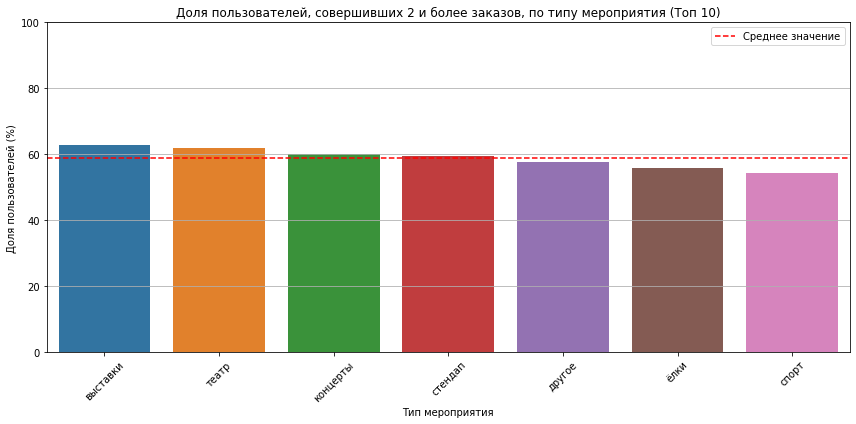

In [97]:
# Создадим датафрейм для удобства работы
event_data = pd.DataFrame({
    'total_users': event_type_counts,
    'users_two_or_more': event_type_counts_two_or_more,
    'share_two_or_more': event_type_share_two_or_more
}).fillna(0)  # Заполняем NaN нулями

# Сортируем данные по количеству пользователей и выбираем 10 типов мероприятий с наибольшим количеством пользователей
top_event_types = event_data.sort_values(by='total_users', ascending=False).head(10)

# Сортируем выбранные типы мероприятий по доле пользователей, совершивших 2 и более заказов, от большего к меньшему
top_event_types = top_event_types.sort_values(by='share_two_or_more', ascending=False)

# Рассчитываем среднее значение доли пользователей
mean_share = top_event_types['share_two_or_more'].mean()

# Визуализация
# Устанавливаем размеры графика
plt.figure(figsize=(12, 6))

# Строим столбчатую диаграмму
sns.barplot(x=top_event_types.index, y=top_event_types['share_two_or_more'])

# Добавляем линию среднего значения
plt.axhline(mean_share, color='red', linestyle='--', label='Среднее значение')

# Устанавливаем заголовок для графика
plt.title('Доля пользователей, совершивших 2 и более заказов, по типу мероприятия (Топ 10)')
plt.xlabel('Тип мероприятия')
plt.ylabel('Доля пользователей (%)')
plt.xticks(rotation=45)
plt.ylim(0, 100)  # Устанавливаем пределы по оси Y от 0 до 100%
plt.grid(axis='y')

# Добавляем легенду
plt.legend()

# Показываем график
plt.tight_layout()
plt.show()

Пользователи почти всех типов мероприятий совершают повторные покупки в очень похожем диапазоне (примерно 55–63%). Самые высокие доли повторных заказов у выставок (62–63%) и театра (61–62%). Концерты и стендап — около 60%. «Другое» и «ёлки» — 56–58%. Однако, у категории "ёлки" маленький размер выборки, результаты (в данном случае доли пользователей, совершивших 2 и более заказов) могут варьироваться значительно. Это значит, что небольшие изменения в данных могут приводить к большим колебаниям в результатах. Наименьшая доля у спорта — 55%. Различия небольшие, поэтому в целом повторные покупки равномерно распределены по типам. 

In [98]:
# Группировка по типу устройства
device_type_counts = filtered_user_profile['first_device_type'].value_counts()

# Подсчет пользователей, совершивших 2 и более заказов, для каждого типу устройства
device_type_counts_two_or_more = filtered_user_profile[filtered_user_profile['is_two'] == 1]['first_device_type'].value_counts()

# Расчет доли пользователей, совершивших 2 и более заказов, для каждого типу устройства
device_type_share_two_or_more = device_type_counts_two_or_more / device_type_counts * 100

# Выводим результатов
display("Количество пользователей по типу устройства:")
display(device_type_counts)

display("\nКоличество пользователей, совершивших 2 и более заказов, для каждого типа устройства:")
display(device_type_counts_two_or_more)

display("\nДоля пользователей, совершивших 2 и более заказов, для каждого типа устройства:")
display(device_type_share_two_or_more)

'Количество пользователей по типу устройства:'

mobile     17195
desktop     3552
Name: first_device_type, dtype: int64

'\nКоличество пользователей, совершивших 2 и более заказов, для каждого типа устройства:'

mobile     10176
desktop     2208
Name: first_device_type, dtype: int64

'\nДоля пользователей, совершивших 2 и более заказов, для каждого типа устройства:'

mobile     59.179994
desktop    62.162162
Name: first_device_type, dtype: float64

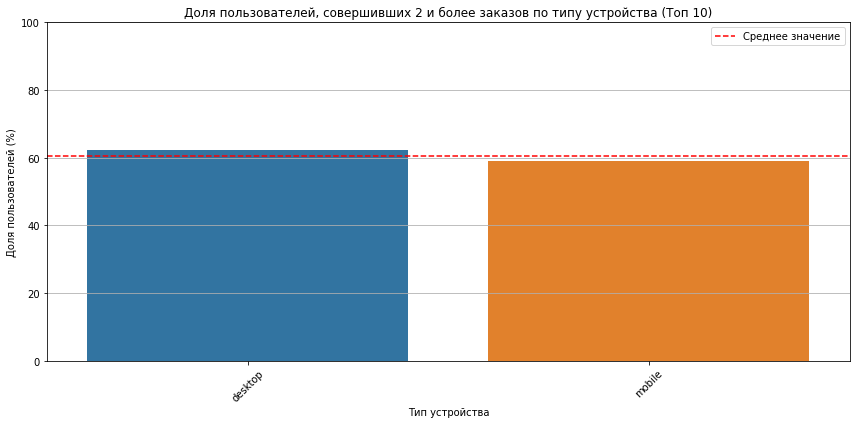

In [99]:
# Создадим датафрейм для удобства работы
device_data = pd.DataFrame({
    'total_users': device_type_counts,
    'users_two_or_more': device_type_counts_two_or_more,
    'share_two_or_more': device_type_share_two_or_more
}).fillna(0)  # Заполняем NaN нулями

# Сортируем данные по количеству пользователей и выбираем 10 типов устройств с наибольшим количеством пользователей
top_device_type = device_data.sort_values(by='total_users', ascending=False).head(10)

# Сортируем выбранные типы устройств по доле пользователей, совершивших 2 и более заказов, от большего к меньшему
top_device_type = top_device_type.sort_values(by='share_two_or_more', ascending=False)

# Рассчитываем среднее значение доли пользователей
mean_share = top_device_type['share_two_or_more'].mean()

# Визуализация
# Устанавливаем размеры графика
plt.figure(figsize=(12, 6))

# Строим столбчатую диаграмму
sns.barplot(x=top_device_type.index, y=top_device_type['share_two_or_more'])

# Добавляем линию среднего значения
plt.axhline(mean_share, color='red', linestyle='--', label='Среднее значение')

# Устанавливаем заголовок для графика
plt.title('Доля пользователей, совершивших 2 и более заказов по типу устройства (Топ 10)')
plt.xlabel('Тип устройства')
plt.ylabel('Доля пользователей (%)')
plt.xticks(rotation=45)
plt.ylim(0, 100)  # Устанавливаем пределы по оси Y от 0 до 100%
plt.grid(axis='y')

# Добавляем легенду
plt.legend()

# Показываем график
plt.tight_layout()
plt.show()

Общее количество пользователей на мобильных устройствах зарегистрировано 17195 пользователей, на компьютерах 3552 пользователя.
Пользователи с 2 и более заказами:из мобильных пользователей 10176 (около 59.18%) совершили 2 и более заказа; из пользователей компьютером 2208 (около 62.16%) совершили 2 и более заказа.
Доля повторных заказов: доля пользователей, совершивших 2 и более заказов, выше среди пользователей компьютером (62.16%) по сравнению с мобильными (59.18%).

Несмотря на то, что количество пользователей на мобильных устройствах значительно больше, процент пользователей с повторными заказами выше на компьютерах. Это может указывать на то, что пользователи, использующие ПК или ноутбуки, более склонны к совершению повторных покупок, возможно, из-за удобства или более детального просмотра информации о товарах/услугах на большом экране. 

In [100]:
# Группировка по региону
region_counts = filtered_user_profile['first_region'].value_counts()

# Подсчет пользователей, совершивших 2 и более заказов по каждому региону 
region_counts_two_or_more = filtered_user_profile[filtered_user_profile['is_two'] == 1]['first_region'].value_counts()

# Расчет доли пользователей, совершивших 2 и более заказов по каждому региону 
region_share_two = region_counts_two_or_more / region_counts * 100

# Сортировка по убыванию
region_share_two_or_more = region_share_two.sort_values(ascending=False)

# Выводим результаты
display("Количество пользователей по региону:")
display(region_counts)

display("\nКоличество пользователей, совершивших 2 и более заказов по каждому региону:")
display(region_counts_two_or_more)

display("\nДоля пользователей, совершивших 2 и более заказов по каждому региону:")
display(region_share_two_or_more)

'Количество пользователей по региону:'

Каменевский регион          6770
Североярская область        3611
Широковская область         1182
Озернинский край             663
Малиновоярский округ         513
                            ... 
Верховинская область           2
Яснопольский округ             1
Сосноводолинская область       1
Верхозёрский край              1
Светолесский край              1
Name: first_region, Length: 81, dtype: int64

'\nКоличество пользователей, совершивших 2 и более заказов по каждому региону:'

Каменевский регион      4105
Североярская область    2248
Широковская область      747
Озернинский край         361
Шанырский регион         299
                        ... 
Залесский край             1
Тихогорская область        1
Верхозёрский край          1
Теплоозёрский округ        1
Крутоводский регион        1
Name: first_region, Length: 77, dtype: int64

'\nДоля пользователей, совершивших 2 и более заказов по каждому региону:'

Верхозёрский край           100.000000
Озернопольская область       88.461538
Радужнопольский край         76.190476
Лесостепной край             69.090909
Лесноярский край             66.666667
                               ...    
Крутоводский регион          33.333333
Островогорский округ               NaN
Светолесский край                  NaN
Сосноводолинская область           NaN
Яснопольский округ                 NaN
Name: first_region, Length: 81, dtype: float64

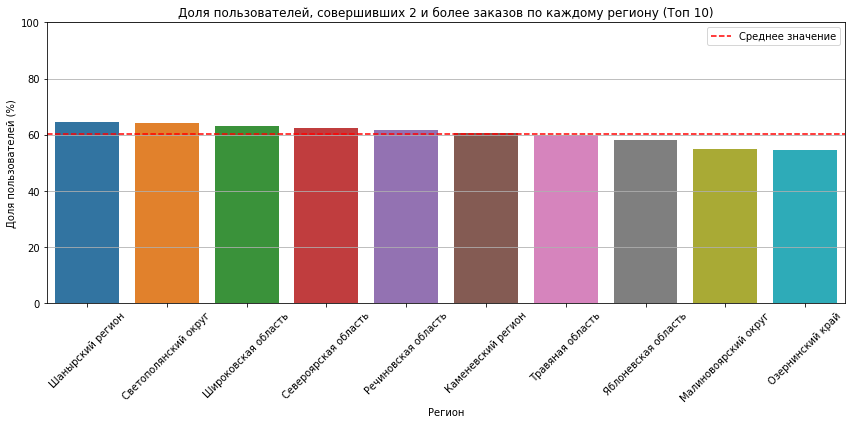

In [101]:
# Создадим датафрейм для удобства работы
region_data = pd.DataFrame({
    'total_users': region_counts,
    'users_two_or_more': region_counts_two_or_more,
    'share_two_or_more': region_share_two_or_more
}).fillna(0)  # Заполняем NaN нулями

# Сортируем данные по количеству пользователей и выбираем 10 регионов с наибольшим количеством пользователей
top_region = region_data.sort_values(by='total_users', ascending=False).head(10)

# Сортируем выбранные регионы по доле пользователей, совершивших 2 и более заказов, от большего к меньшему
top_region = top_region.sort_values(by='share_two_or_more', ascending=False)

# Рассчитываем среднее значение доли пользователей
mean_share = top_region['share_two_or_more'].mean()

# Визуализация
# Устанавливаем размеры графика
plt.figure(figsize=(12, 6))

# Строим столбчатую диаграмму
sns.barplot(x=top_region.index, y=top_region['share_two_or_more'])

# Добавляем линию среднего значения
plt.axhline(mean_share, color='red', linestyle='--', label='Среднее значение')

# Устанавливаем заголовок для графика
plt.title('Доля пользователей, совершивших 2 и более заказов по каждому региону (Топ 10)')
plt.xlabel('Регион')
plt.ylabel('Доля пользователей (%)')
plt.xticks(rotation=45)
plt.ylim(0, 100)  # Устанавливаем пределы по оси Y от 0 до 100%
plt.grid(axis='y')

# Добавляем легенду
plt.legend()

# Показываем график
plt.tight_layout()
plt.show()

In [102]:
# Указанные регионы
regions = ['Озернинский край', 'Малиновоярский округ', 'Травяная область', 'Светополянский округ', 'Речиновская область', 'Яблоневская область']

# Фильтруем датафрейм по регионам
filtered_users = filtered_user_profile[filtered_user_profile['first_region'].isin(regions)]

# Считаем количество пользователей в каждом регионе
user_counts = filtered_users['first_region'].value_counts()

# Выводим результат
display(user_counts)

Озернинский край        663
Малиновоярский округ    513
Травяная область        470
Светополянский округ    437
Речиновская область     419
Яблоневская область     399
Name: first_region, dtype: int64

В большинстве регионов доля пользователей, сделавших 2 и более заказа, превышает 50%, то есть повторные заказы совершают большая часть пользователей. Разброс невелик: от примерно 54% (самый низкий — Озернинский край) до 65–66% (лидеры — Шанырский/Светополянский регионы). Разница порядка 10–12 процентных пунктов. Но при интерпретации результатов стоит учесть размер сегментов. В маленьких сегментах: Озернинский край, Малиновоярский округ, Травяная область, Шанырский регион, Светополянский округ, Речиновская область, Яблоневская область, доля которых располагается в диапаоне от 55% до 65%, что весомо, могут быть недостоверными, то есть показывать широкую вариацию значений. Исходя из выше сделанных выводов, так же учитывая относительно ровную удерживаемость в лид-регионах, к лидерам среди регионов, доля пользователей которых сделали 2 и более заказа, отнесем Каменевский регион (более 60%), Североярская область (около 62%), Широковская область (около 64%).

В целом наблюдается относительно ровная удерживаемость в лид‑регионах; есть пространство для улучшения в регионах с более низкой долей повторных заказов. 

In [103]:
# Группировка по билетному оператору
service_name_counts = filtered_user_profile['first_service_name'].value_counts()

# Подсчет пользователей, совершивших 2 и более заказов по билетному оператору
service_name_counts_two_or_more = filtered_user_profile[filtered_user_profile['is_two'] == 1]['first_service_name'].value_counts()

# Расчет доли пользователей, совершивших 2 и более заказов по билетному оператору
service_name_share_two_or_more = service_name_counts_two_or_more / service_name_counts * 100

# Выводим результаты
display("Количество пользователей по билетному оператору:")
display(service_name_counts)

display("\nКоличество пользователей, совершивших 2 и более заказов по билетному оператору:")
display(service_name_counts_two_or_more)

display("\nДоля пользователей, совершивших 2 и более заказов по билетному оператору:")
display(service_name_share_two_or_more)

'Количество пользователей по билетному оператору:'

Билеты без проблем        4949
Мой билет                 2852
Лови билет!               2706
Билеты в руки             2419
Облачко                   2100
Весь в билетах            1230
Лучшие билеты             1137
Прачечная                  550
Край билетов               437
Дом культуры               338
Яблоко                     311
Тебе билет!                301
Городской дом культуры     213
Мир касс                   198
За билетом!                197
Быстробилет                160
Show_ticket                156
Выступления.ру              99
Восьмёрка                   82
Быстрый кассир              56
Crazy ticket!               45
Росбилет                    39
Радио ticket                35
Телебилет                   29
Реестр                      27
Цвет и билет                21
Шоу начинается!             18
КарандашРУ                  14
Кино билет                   9
Вперёд!                      7
Билет по телефону            6
Тех билет                    3
Лимоны  

'\nКоличество пользователей, совершивших 2 и более заказов по билетному оператору:'

Билеты без проблем        2899
Мой билет                 1690
Лови билет!               1608
Билеты в руки             1467
Облачко                   1256
Весь в билетах             753
Лучшие билеты              680
Прачечная                  332
Край билетов               279
Дом культуры               212
Тебе билет!                179
Яблоко                     163
Городской дом культуры     124
Мир касс                   123
За билетом!                114
Show_ticket                101
Быстробилет                 94
Выступления.ру              63
Восьмёрка                   55
Быстрый кассир              47
Crazy ticket!               31
Росбилет                    25
Реестр                      21
Радио ticket                14
Телебилет                   14
Цвет и билет                13
Шоу начинается!              5
Кино билет                   5
КарандашРУ                   5
Билет по телефону            5
Вперёд!                      4
Лимоны                       1
Зе Бест!

'\nДоля пользователей, совершивших 2 и более заказов по билетному оператору:'

Crazy ticket!              68.888889
Show_ticket                64.743590
Билет по телефону          83.333333
Билеты без проблем         58.577490
Билеты в руки              60.644895
Быстробилет                58.750000
Быстрый кассир             83.928571
Весь в билетах             61.219512
Восьмёрка                  67.073171
Вперёд!                    57.142857
Выступления.ру             63.636364
Городской дом культуры     58.215962
Дом культуры               62.721893
За билетом!                57.868020
Зе Бест!                  100.000000
КарандашРУ                 35.714286
Кино билет                 55.555556
Край билетов               63.844394
Лимоны                     50.000000
Лови билет!                59.423503
Лучшие билеты              59.806508
Мир касс                   62.121212
Мой билет                  59.256662
Облачко                    59.809524
Прачечная                  60.363636
Радио ticket               40.000000
Реестр                     77.777778
Р

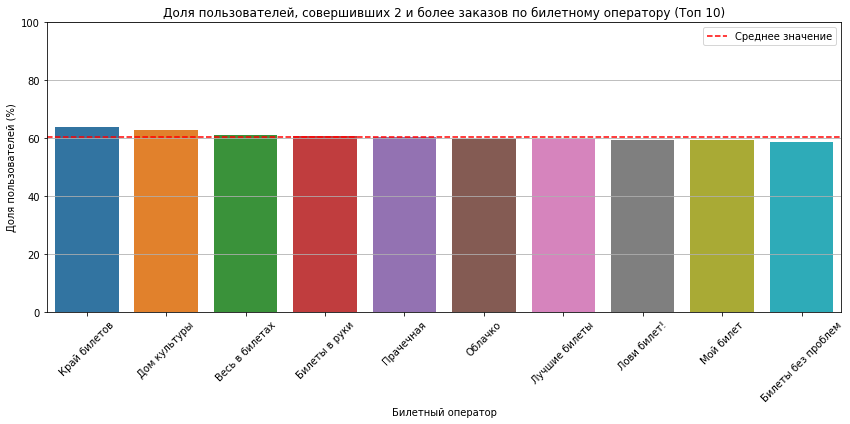

In [104]:
# Создадим датафрейм для удобства работы
service_name_data = pd.DataFrame({
    'total_users': service_name_counts,
    'users_two_or_more': service_name_counts_two_or_more,
    'share_two_or_more': service_name_share_two_or_more
}).fillna(0)  # Заполняем NaN нулями

# Сортируем данные по количеству пользователей и выбираем 10 билетных операторов с наибольшим количеством пользователей
top_service_name = service_name_data.sort_values(by='total_users', ascending=False).head(10)

# Сортируем выбранные операторы по доле пользователей, совершивших 2 и более заказов, от большего к меньшему
top_service_name = top_service_name.sort_values(by='share_two_or_more', ascending=False)

# Рассчитываем среднее значение доли пользователей
mean_share = top_service_name['share_two_or_more'].mean()

# Визуализация
plt.figure(figsize=(12, 6))

# Строим столбчатую диаграмму
sns.barplot(x=top_service_name.index, y=top_service_name['share_two_or_more'])

# Добавляем линию среднего значения
plt.axhline(mean_share, color='red', linestyle='--', label='Среднее значение')

# Устанавливаем заголовок для графика
plt.title('Доля пользователей, совершивших 2 и более заказов по билетному оператору (Топ 10)')
plt.xlabel('Билетный оператор')
plt.ylabel('Доля пользователей (%)')
plt.xticks(rotation=45)
plt.ylim(0, 100)  # Устанавливаем пределы по оси Y от 0 до 100%
plt.grid(axis='y')

# Добавляем легенду
plt.legend()

# Показываем график
plt.tight_layout()
plt.show()

Доли пользователей, совершивших 2 и более заказов, у всех 10 операторов лежат примерно в одном диапазоне (приблизительно 59–65%), без ярко выраженного аутсайдера или лидера. У большинства операторов относительно высокая повторная покупаемость — порядка 60%.  Но сегменты Прачечная, Край билетов, Дом культуры очень маленькие и их высокая доля искажает анализ. Разброс большой, следовательно на уровне этих метрик конкуренция высокая. Однако сегменты Билеты без проблем  (2899, 59%), Мой билет (1690, 59%), Лови билет! (1608, 59%), Билеты в руки (1467, 61%), Облачко (1256, 60%) самые крупные среди билетных операторов, поэтому целесообразней к лидерам отнести именно эти сегменты.

---
##### проверка продуктовых гипотез

**Задача 4.1.3.** Опираясь на выводы из задач выше, проверьте продуктовые гипотезы:

- **Гипотеза 1.** Тип мероприятия влияет на вероятность возврата на Яндекс Афишу: пользователи, которые совершили первый заказ на спортивные мероприятия, совершают повторный заказ чаще, чем пользователи, оформившие свой первый заказ на концерты.
- **Гипотеза 2.** В регионах, где больше всего пользователей посещают мероприятия, выше доля повторных заказов, чем в менее активных регионах.

---

Гипотеза 1. Тип мероприятия влияет на вероятность возврата на Яндекс Афишу: пользователи, которые совершили первый заказ на спортивные мероприятия, совершают повторный заказ чаще, чем пользователи, оформившие свой первый заказ на концерты.

Пользователи, которые совершили первый заказ на спортивные мероприятия, совершают повторный заказ **реже** - 54.4%, чем пользователи, оформившие свой первый заказ на концерты - 60.3%. Опираясь на выводы, сделанные выше, Гипотеза 1  **не подтвердилась**. 

Гипотеза 2. В регионах, где больше всего пользователей посещают мероприятия, выше доля повторных заказов, чем в менее активных регионах.

In [105]:
# Указанные регионы
regions = ['Верхозёрский край', 'Озернопольская область', 'Радужнопольский край', 'Лесостепной край', 'Лесноярский край']

# Фильтруем датафрейм по регионам
filtered_users = filtered_user_profile[filtered_user_profile['first_region'].isin(regions)]

# Считаем количество пользователей в каждом регионе
user_counts = filtered_users['first_region'].value_counts()

# Выводим результат
display(user_counts)

Лесостепной край          55
Озернопольская область    26
Радужнопольский край      21
Лесноярский край           3
Верхозёрский край          1
Name: first_region, dtype: int64

В регионах (в первых 5 регионах: Каменевский регион - 6770, Североярская область - 3611, Широковская область - 1182, Озернинский край - 663, Малиновоярский округ - 513), где больше всего пользователей посещают мероприятия, **выше** доля повторных заказов, чем в менее активных регионах, не смотря на то, что в менее активных регионах: Верхозёрский край - 100.0%, Озернопольская область - 88.5%, Радужнопольский край - 76.2%, Лесостепной край - 69.1%, Лесноярский край - 66.7% очень высокие доли, нужно учитывать то, что изначально это очень маленькие сегменты, высокий процент по которым может вводить в заблуждение. В этих менее активных регионах на каждого человека приходится более высокая доля. Опираясь на выводы, сделанные выше, Гипотеза 2  **подтвердилась**. 

---

#### исследование поведения пользователей через показатели выручки и состава заказа

Изучите количественные характеристики заказов пользователей, чтобы узнать среднюю выручку сервиса с заказа и количество билетов, которое пользователи обычно покупают.

Эти метрики важны не только для оценки выручки, но и для оценки вовлечённости пользователей. Возможно, пользователи с более крупными и дорогими заказами более заинтересованы в сервисе и поэтому чаще возвращаются.

---

##### задача 1

 Проследите связь между средней выручкой сервиса с заказа и повторными заказами.

- Постройте сравнительные гистограммы распределения средней выручки с билета (`avg_revenue_rub`):
    - для пользователей, совершивших один заказ;
    - для вернувшихся пользователей, совершивших 2 и более заказа.
- Ответьте на вопросы:
    - В каких диапазонах средней выручки концентрируются пользователи из каждой группы?
    - Есть ли различия между группами?

Текст на сером фоне:
    
**Рекомендация:**

1. Используйте одинаковые интервалы (`bins`) и прозрачность (`alpha`), чтобы визуально сопоставить распределения.
2. Задайте параметру `density` значение `True`, чтобы сравнивать форму распределений, даже если число пользователей в группах отличается.

---


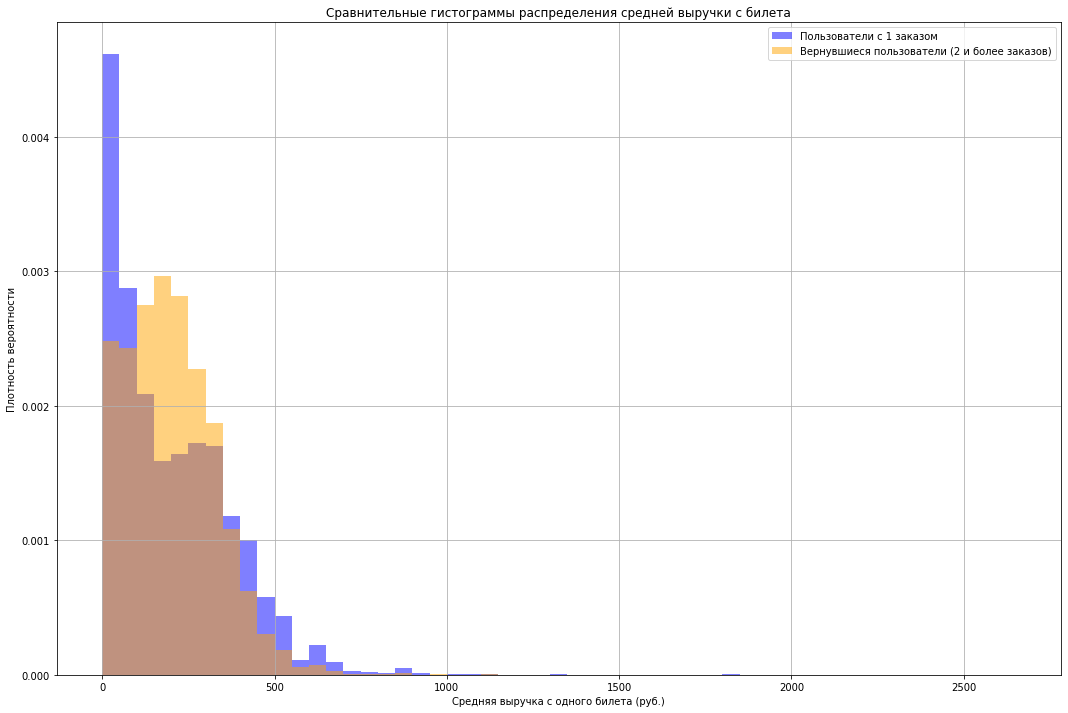

In [107]:
# Рассчитываем среднюю выручку с одного билета для пользователей с 1 заказом
one_order_users = filtered_user_profile[filtered_user_profile['is_two'] == 0]
one_order_users_avg_revenue_per_ticket = one_order_users['average_revenue'] / one_order_users['average_tickets']

# Рассчитываем среднюю выручку с одного билета для совершивших 2 и более заказа
returning_users = filtered_user_profile[filtered_user_profile['is_two'] == 1]
returning_users_avg_revenue_per_ticket = returning_users['average_revenue'] / returning_users['average_tickets']

# Настраиваем параметры для гистограмм
bins = range(0, int(filtered_user_profile['average_revenue'].max()) + 50, 50)  # Интервалы по 50 рублей

# Строим гистограммы
plt.figure(figsize=(18, 12))
plt.hist(one_order_users_avg_revenue_per_ticket, bins=bins, alpha=0.5, density=True, label='Пользователи с 1 заказом', color='blue')
plt.hist(returning_users_avg_revenue_per_ticket, bins=bins, alpha=0.5, density=True, label='Вернувшиеся пользователи (2 и более заказов)', color='orange')

# Добавляем заголовок и метки
plt.title('Сравнительные гистограммы распределения средней выручки с билета')
plt.xlabel('Средняя выручка с одного билета (руб.)')
plt.ylabel('Плотность вероятности')
plt.legend()
plt.grid()

# Показываем график
plt.show()

Оба распределения сильно скошены вправо (есть длинный хвост — редкие, но крупные покупки). Пользователи с 1 заказом сосредоточены в зоне очень низкой средней выручки с билета, пик близок к нулю и малым суммам до 100 руб. Возвращающиеся пользователи в целом смещены вправо. Их средняя выручка с билета выше (большая доля в диапазоне средних сумм 100–400 руб.), то есть повторные покупатели приносят больше на одну покупку. При этом распределения перекрываются: не все пользователи с 1 заказом дают мало выручки и не все вернувшиеся дают много; есть общие пересечения и отдельные крупные выбросы в обеих группах. Но больше выбросов наблюдается у пользователей с 1 заказом (до 1800). Пользователи с 2 и более заказами дают выше средний чек.

---
##### задача 2

Сравните распределение по средней выручке с заказа в двух группах пользователей:

- совершившие 2–4 заказа;
- совершившие 5 и более заказов.

Ответьте на вопрос: есть ли различия по значению средней выручки с заказа между пользователями этих двух групп?

---


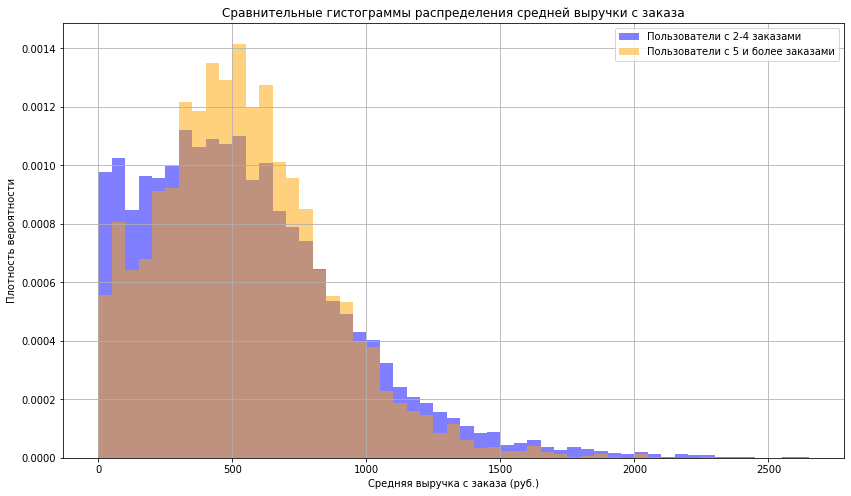

In [109]:
# Рассчитываем среднюю выручку с одного заказа для пользователей с 2-4 заказами
two_order_users = filtered_user_profile[filtered_user_profile['is_two'] == 1]
two_order_users_avg_revenue = two_order_users['average_revenue'] 

# Рассчитываем среднюю выручку с одного заказа для пользователей с 5 и более заказами
five_order_users = filtered_user_profile[filtered_user_profile['is_five'] == 1]
five_order_users_avg_revenue = five_order_users['average_revenue']

# Настраиваем параметры для гистограмм
bins = range(0, int(filtered_user_profile['average_revenue'].max()) + 50, 50)  # Интервалы по 50 рублей

# Строим гистограммы
plt.figure(figsize=(14, 8))
plt.hist(two_order_users_avg_revenue, bins=bins, alpha=0.5, density=True, label='Пользователи с 2-4 заказами', color='blue')
plt.hist(five_order_users_avg_revenue, bins=bins, alpha=0.5, density=True, label='Пользователи с 5 и более заказами', color='orange')

# Добавляем заголовок и метки
plt.title('Сравнительные гистограммы распределения средней выручки с заказа')
plt.xlabel('Средняя выручка с заказа (руб.)')
plt.ylabel('Плотность вероятности')
plt.legend()
plt.grid()

# Показываем график
plt.show()

Оба распределения похожи по форме, наблюдается правосторонняя скошенность на обоих распределениях. Пиковая плотность у пользователей с 5 и более заказами чуть смещена в сторону больших значений (примерно 400–600 руб.). У пользователей с 2–4 заказами видно больше массы на очень низких значениях от 0 до примерно 300 руб. (больше маленьких средних чеков) и немного больше хвост на больших чеках (значения доходят до 3000 руб.). 
То есть у лояльных пользователей (с 5 и более заказами) типичный средний чек немного выше и распределение более сконцентрировано, у малоактивных (с 2-4 заказами) больше разброса и доля очень маленьких чеков.

---
##### задача 3

Проанализируйте влияние среднего количества билетов в заказе на вероятность повторной покупки.

- Изучите распределение пользователей по среднему количеству билетов в заказе (`avg_tickets_count`) и опишите основные наблюдения.
- Разделите пользователей на несколько сегментов по среднему количеству билетов в заказе:
    - от 1 до 2 билетов;
    - от 2 до 3 билетов;
    - от 3 до 5 билетов;
    - от 5 и более билетов.
- Для каждого сегмента подсчитайте общее число пользователей и долю пользователей, совершивших повторные заказы.
- Ответьте на вопросы:
    - Как распределены пользователи по сегментам — равномерно или сконцентрировано?
    - Есть ли сегменты с аномально высокой или низкой долей повторных покупок?

---

In [110]:
# Функция для определения сегмента
def determine_segment(avg_tickets):
    if avg_tickets < 2:
        return '1-2'
    elif avg_tickets < 3:
        return '2-3'
    elif avg_tickets < 5:
        return '3-5'
    else:
        return '5+'

# Создаем новый датафрейм для сегментации
segment_summary = (
    filtered_user_profile.groupby(filtered_user_profile['average_tickets'].apply(determine_segment))
    .agg(total_users=('user_id', 'count'),
         repeat_purchase_rate=('is_two', 'mean'))
    .reset_index()
)

# Преобразовываем доли повторных заказов в проценты
segment_summary['repeat_purchase_rate'] *= 100

# Выводим результаты
display(segment_summary)

# Анализируем распределения
display("\nОсновные наблюдения:")
for index, row in segment_summary.iterrows():
    display(f"Сегмент {row['average_tickets']}:")
    display(f" - Общее число пользователей: {row['total_users']}")
    display(f" - Доля повторных покупок: {row['repeat_purchase_rate']:.2f}%")

,average_tickets,total_users,repeat_purchase_rate
0,1-2,2406,51.163757
1,2-3,8751,71.340418
2,3-5,8929,53.600627
3,5+,661,18.759455


'\nОсновные наблюдения:'

'Сегмент 1-2:'

' - Общее число пользователей: 2406'

' - Доля повторных покупок: 51.16%'

'Сегмент 2-3:'

' - Общее число пользователей: 8751'

' - Доля повторных покупок: 71.34%'

'Сегмент 3-5:'

' - Общее число пользователей: 8929'

' - Доля повторных покупок: 53.60%'

'Сегмент 5+:'

' - Общее число пользователей: 661'

' - Доля повторных покупок: 18.76%'

Пользователи, которые покупают от 1 до 2 билетов (сегмент 1-2), составляют значительное количество (2406 пользователей) и имеют довольно высокую долю повторных покупок (51.16%). Это говорит о том, что более половины этих пользователей возвращаются для повторной покупки. Пользователи, покупающие от 2 до 3 билетов (сегмент 2-3), имеют наивысшую долю повторных покупок (71.34%) при числе пользователей 8751. Это может свидетельствовать о том, что этот сегмент наиболее лоялен и активно использует услуги. Сегмент 3-5 показывает умеренную долю повторных покупок (53.60%) при количестве пользователей 8929. Это также подтверждает, что пользователи с большим количеством билетов склонны к повторным покупкам, но не так сильно, как в сегменте 2-3. Сегмент 5+ имеет наименьшее количество пользователей (661) и самую низкую долю повторных покупок (18.76%). Это может указывать на то, что пользователи, которые делают много покупок за раз, могут быть менее заинтересованы в повторных покупках, возможно, из-за удовлетворенности от одного крупного приобретения или из-за того, что они уже достигли своей цели.

 Сегменты с средним количеством билетов (2-3 и 3-5) показывают более высокую активность и лояльность, что может быть связано с тем, что эти пользователи находятся на этапе знакомства с продуктом или услугой. Высокая доля повторных покупок в сегменте 2-3 может указывать на успешные маркетинговые стратегии или удовлетворенность пользователей, что стоит использовать для дальнейшего продвижения и стимулирования повторных покупок.

Учитывая высокую лояльность сегмента 2-3, можно рассмотреть возможность введения программ лояльности или специальных предложений для этого сегмента, чтобы увеличить количество повторных покупок и удержание клиентов. Для сегмента 5+ стоит проанализировать причины низкой доли повторных покупок и рассмотреть возможность улучшения пользовательского опыта или предложения дополнительных услуг для повышения интереса к повторным покупкам.

Данные показывают, что поведение пользователей варьируется в зависимости от количества билетов, которые они покупают. Сегменты с меньшим количеством билетов демонстрируют более высокую лояльность, в то время как пользователи с большим количеством билетов могут требовать дополнительного внимания для повышения их вовлеченности и частоты повторных покупок.

---

#### исследование временных характеристик первого заказа и их влияния на повторные покупки

Изучите временные параметры, связанные с первым заказом пользователей:

- день недели первой покупки;
- время с момента первой покупки — лайфтайм;
- средний интервал между покупками пользователей с повторными заказами.

---
##### задача первая

**Задача 4.3.1.** Проанализируйте, как день недели, в которой была совершена первая покупка, влияет на поведение пользователей.

- По данным даты первого заказа выделите день недели.
- Для каждого дня недели подсчитайте общее число пользователей и долю пользователей, совершивших повторные заказы. Результаты визуализируйте.
- Ответьте на вопрос: влияет ли день недели, в которую совершена первая покупка, на вероятность возврата клиента?

---


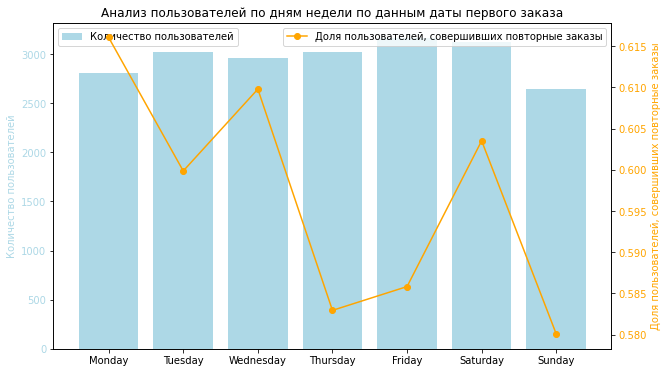

,first_order_weekday,total_users,repeat_customers
1,Monday,2813,0.616068
5,Tuesday,3024,0.599868
6,Wednesday,2960,0.609797
4,Thursday,3026,0.582948
0,Friday,3163,0.585836
2,Saturday,3120,0.603526
3,Sunday,2641,0.580083


In [111]:
# Создаем новый датафрейм с использованием .copy()
new_user_profile = filtered_user_profile.copy()

# Преобразуем дату первого заказа в datetime формат с использованием .loc
new_user_profile.loc[:, 'first_order_date'] = pd.to_datetime(filtered_user_profile['first_order_date'])

# Создаем новый датафрейм для анализа
user_analysis = new_user_profile.copy()

# Выделяем день недели из даты первого заказа
user_analysis['first_order_weekday'] = user_analysis['first_order_date'].dt.day_name()

# Группируем по дню недели и считаем общее количество пользователей и долю повторных покупателей
result = user_analysis.groupby('first_order_weekday').agg(
    total_users=('user_id', 'count'),
    repeat_customers=('is_two', 'mean')  # среднее значение is_two даст долю повторных покупателей
).reset_index()

# Сортируем по дням недели
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
result['first_order_weekday'] = pd.Categorical(result['first_order_weekday'], categories=days_order, ordered=True)
result = result.sort_values('first_order_weekday')

# Визуализируем результаты
fig, ax1 = plt.subplots(figsize=(10, 6))

# Столбчатая диаграмма для общего числа пользователей
ax1.bar(result['first_order_weekday'], result['total_users'], color='lightblue', label='Количество пользователей')
ax1.set_ylabel('Количество пользователей', color='lightblue')
ax1.tick_params(axis='y', labelcolor='lightblue')

# Создаем второй ось для доли повторных покупателей
ax2 = ax1.twinx()
ax2.plot(result['first_order_weekday'], result['repeat_customers'], color='orange', marker='o', label='Доля пользователей, совершивших повторные заказы')
ax2.set_ylabel('Доля пользователей, совершивших повторные заказы', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Добавляем легенду и заголовок
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.title('Анализ пользователей по дням недели по данным даты первого заказа')
plt.show()

# Ответ на вопрос о влиянии дня недели на вероятность возврата клиента
display(result)

Пятница (3163 пользователя) и Суббота (3120 пользователя) являются днями с наибольшим числом пользователей, что может указывать на то, что в эти дни пользователи наиболее активно совершают покупки.

Понедельник демонстрирует наивысшую долю повторных покупателей (61.61%), что может свидетельствовать о том, что пользователи, совершившие покупки в начале недели, более склонны возвращаться. Вторник и Среда также показывают высокие показатели повторных покупок (59.99% и 60.98% соответственно), что говорит о стабильной лояльности пользователей в начале недели. Наименьшая доля повторных покупателей наблюдается в Четверг (58.29%) и Воскресенье (58.01%), что может указывать на снижение интереса или активности пользователей в эти дни.

 **Тенденции по дням недели**
   Первые три дня недели (Понедельник, Вторник, Среда) показывают высокую долю повторных покупок, что может говорить о том, что пользователи начинают неделю с намерением совершать покупки. Однако в эти дни недели количество пользователей не самое высокое. В то же время, в конце недели (Четверг, Пятница, Суббота) наблюдается  немного меньшая лояльность, несмотря на большее общее количество пользователей. А в Воскресенье люди отдыхают даже от покупок.
   
Когда при планировании досуга возвращаемость остаётся примерно одинаковой — это говорит о том, что день недели первой покупки не влияет на лояльность, а повторное использование сервиса определяется скорее качеством опыта и интересом к мероприятиям.

---
##### задача вторая

**Задача 4.3.2.** Изучите, как средний интервал между заказами влияет на удержание клиентов.

- Рассчитайте среднее время между заказами для двух групп пользователей:
    - совершившие 2–4 заказа;
    - совершившие 5 и более заказов.
- Исследуйте, как средний интервал между заказами влияет на вероятность повторного заказа, и сделайте выводы.

---


In [112]:
# Создаем новый датафрейм с использованием .copy()
new_two_filtered_user_profile = filtered_user_profile.copy()

# Преобразуем даты в datetime формат
new_two_filtered_user_profile['first_order_date'] = pd.to_datetime(new_two_filtered_user_profile['first_order_date'])
new_two_filtered_user_profile['last_order_date'] = pd.to_datetime(new_two_filtered_user_profile['last_order_date'])

# Рассчитываем среднее время между заказами
# Для этого нам нужно создать новый столбец с разницей между последним и первым заказом
new_two_filtered_user_profile['days_between_orders'] = (new_two_filtered_user_profile['last_order_date'] - new_two_filtered_user_profile['first_order_date']).dt.days / (filtered_user_profile['total_orders'] - 1)

# Создаем две группы пользователей
group_2_to_4 = new_two_filtered_user_profile[(new_two_filtered_user_profile['total_orders'] >= 2) & (new_two_filtered_user_profile['total_orders'] <= 4)]
group_5_and_more = new_two_filtered_user_profile[new_two_filtered_user_profile['total_orders'] >= 5]

# Рассчитываем среднее время между заказами для каждой группы
mean_days_2_to_4 = group_2_to_4['days_between_orders'].mean()
mean_days_5_and_more = group_5_and_more['days_between_orders'].mean()

# Рассчитываем вероятность повторного заказа для каждой группы
probability_repeat_2_to_4 = group_2_to_4['is_two'].mean()
probability_repeat_5_and_more = group_5_and_more['is_two'].mean()

# Выводим результаты
display(f'Среднее время между заказами для пользователей с 2–4 заказами: {mean_days_2_to_4:.2f} дней')
display(f'Среднее время между заказами для пользователей с 5 и более заказами: {mean_days_5_and_more:.2f} дней')

display(f'Вероятность повторного заказа для пользователей с 2–4 заказами: {probability_repeat_2_to_4:.2f}')
display(f'Вероятность повторного заказа для пользователей с 5 и более заказами: {probability_repeat_5_and_more:.2f}')

'Среднее время между заказами для пользователей с 2–4 заказами: 21.44 дней'

'Среднее время между заказами для пользователей с 5 и более заказами: 11.21 дней'

'Вероятность повторного заказа для пользователей с 2–4 заказами: 1.00'

'Вероятность повторного заказа для пользователей с 5 и более заказами: 1.00'

Пользователи с 2–4 заказами имеют среднее время между заказами 21.44 дня, что указывает на более длительный интервал между их покупками. Это может свидетельствовать о том, что такие пользователи менее активны или менее склонны к частым покупкам. Пользователи с 5 и более заказами имеют значительно меньшее среднее время между заказами — 11.21 дня. Это говорит о высокой активности и вероятной лояльности этих пользователей, которые более склонны совершать частые покупки.

Вероятность повторного заказа для обеих групп пользователей составляет 1.00 (или 100%). Это означает, что все пользователи в обеих группах, по данным анализа, совершают повторные заказы. Это может быть связано с тем, что они уже имеют положительный опыт покупок и удовлетворены продуктом или услугой.

Данные показывают, что пользователи с большим количеством заказов более активны и склонны к частым покупкам, в то время как пользователи с меньшим количеством заказов требуют дополнительных усилий для повышения их активности. Оба сегмента пользователей имеют высокую вероятность повторного заказа, что является положительным знаком для Яндекс Афиши.

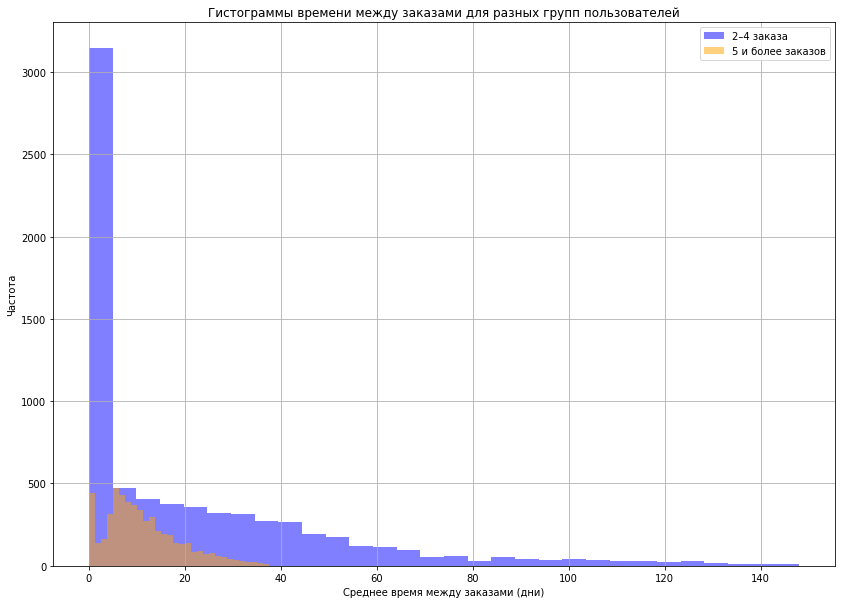

In [113]:
# Настройка графика
plt.figure(figsize=(14, 10))

# Построим гистограммы для группы 2–4 заказа
plt.hist(group_2_to_4['days_between_orders'], bins=30, alpha=0.5, label='2–4 заказа', color='blue')

# Построим гистограммы для группы 5 и более заказов
plt.hist(group_5_and_more['days_between_orders'], bins=30, alpha=0.5, label='5 и более заказов', color='orange')

# Настроим метки и заголовок
plt.xlabel('Среднее время между заказами (дни)')
plt.ylabel('Частота')
plt.title('Гистограммы времени между заказами для разных групп пользователей')
plt.legend()

# Отобразим график
plt.grid()
plt.show()

Оба распределения сильно скошены вправо. Большинство пользователей имеют довольно небольшое среднее время между заказами, но есть длинный хвост с редкими «задержками» до примерно 150 дней. Пользователи с 5 и более заказами в среднем делают заказы чаще, так как их распределение сдвинуто влево и более концентрировано в диапазоне небольших интервалов (особенно 0–10 дней). Группа пользователей с 2–4 заказами шире по разбросу и даёт больше длиннохвостых значений. Среди них больше тех, кто делает заказы редко. Однако, в группе с 2–4 заказами больше пользователей. 

---

#### корреляционный анализ количества покупок и признаков пользователя


Изучите, какие характеристики первого заказа и профиля пользователя могут быть связаны с числом покупок. Для этого используйте универсальный коэффициент корреляции `phi_k`, который позволяет анализировать как числовые, так и категориальные признаки.

---
##### корреляционный анализ

**Задача 4.4.1:** Проведите корреляционный анализ:
- Рассчитайте коэффициент корреляции `phi_k` между признаками профиля пользователя и числом заказов (`total_orders`). При необходимости используйте параметр `interval_cols` для определения интервальных данных.
- Проанализируйте полученные результаты. Если полученные значения будут близки к нулю, проверьте разброс данных в `total_orders`. Такое возможно, когда в данных преобладает одно значение: в таком случае корреляционный анализ может показать отсутствие связей. Чтобы этого избежать, выделите сегменты пользователей по полю `total_orders`, а затем повторите корреляционный анализ. Выделите такие сегменты:
    - 1 заказ;
    - от 2 до 4 заказов;
    - от 5 и выше.
- Визуализируйте результат корреляции с помощью тепловой карты.
- Ответьте на вопрос: какие признаки наиболее связаны с количеством заказов?

---

In [114]:
# Создаем копию
user_prof = filtered_user_profile.copy()

# Явно указываем интервальные столбцы
interval_columns = ['average_revenue', 'average_tickets', 'average_days_between_orders', 'total_orders']

# Вычисляем корреляционную матрицу с использованием phi_k
correlation_matrix = user_prof[interval_columns + ['is_two', 'is_five']].phik_matrix(interval_cols=interval_columns)

# Выводим результат
display('Корреляционная матрица с коэффициентом phi_k для переменной total_orders')
result = correlation_matrix.loc[correlation_matrix.index != 'total_orders'][['total_orders']].sort_values(by='total_orders', ascending=False)
display(result)

'Корреляционная матрица с коэффициентом phi_k для переменной total_orders'

,total_orders
is_five,0.986298
is_two,0.720264
average_days_between_orders,0.303600
average_tickets,0.296819
average_revenue,0.263478


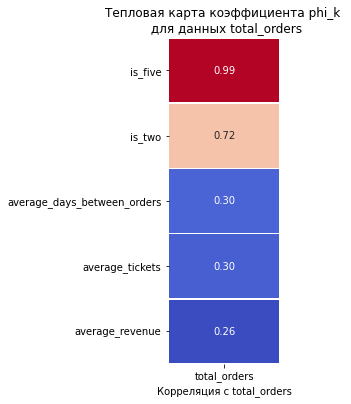

In [115]:
# Строим тепловую карту
plt.figure(figsize=(2, 6))

# Сохраняем матрицу корреляции признака churn с другими признаками клиента
data_heatmap = correlation_matrix.loc[correlation_matrix.index != 'total_orders'][['total_orders']].sort_values(by='total_orders', ascending=False)
sns.heatmap(data_heatmap,
            annot=True, # Отображаем численные значения в ячейках карты
            fmt='.2f', # Форматируем значения корреляции: два знака после точки
            cmap='coolwarm', # Устанавливаем цветовую гамму от красного (макс. значение) к синему
            linewidths=0.5, # Форматируем линию между ячейками карты
            cbar=False # Отключаем цветовую шкалу
           )

# Добавляем заголовок и подпись по оси Х
plt.title('Тепловая карта коэффициента phi_k \n для данных total_orders')
plt.xlabel('Корреляция с total_orders')

# Выводим график
plt.show()

На основе полученной корреляционной матрицы с использованием коэффициента phi_k для переменной total_orders можно сделать следующие наблюдения:

**Сильная связь – is_five (0.986).** Значение 0.986 указывает на очень сильную взаимосвязь между переменной is_five и количеством заказов. Это может свидетельствовать о том, что пользователи, которые уже совершили 5 и более заказов, имеют высокую вероятность продолжать заказывать. Однако важно отметить, что phi-корреляция не обязательно подразумевает монотонную зависимость.

**Умеренная связь – is_two (0.720).** Значение 0.720 также указывает на сильную взаимосвязь. Это может означать, что пользователи, сделавшие 2 заказа, имеют заметно более высокую вероятность совершения дополнительных заказов. Тем не менее, как и в предыдущем случае, это не гарантирует, что увеличение числа пользователей с 2 заказами приведет к увеличению числа заказов.

**Слабая связь – average_days_between_orders (0.304).** Это значение указывает на умеренную взаимосвязь. Оно может свидетельствовать о том, что пользователи, делающие заказы с меньшими интервалами между ними, могут иметь тенденцию к большему количеству заказов. Однако это не обязательно означает, что сокращение времени между заказами приведет к увеличению общего числа заказов.

**Слабая связь – average_tickets (0.297).** Похожая ситуация наблюдается и с этой переменной. Она показывает умеренную взаимосвязь, что может означать, что пользователи с большим средним числом билетов в заказе имеют тенденцию к большему количеству заказов, но это не указывает на причинно-следственную связь.

**Слабая связь – average_revenue (0.263).** Это значение указывает на слабую взаимосвязь между средней выручкой и количеством заказов. Хотя существует связь между этими переменными, она не так сильна, как в предыдущих случаях.

Итак, переменные is_five и is_two показывают наиболее значимые взаимосвязи с количеством заказов, что предполагает, что пользователи, которые уже сделали несколько заказов, могут продолжать заказывать в будущем. Остальные переменные демонстрируют более слабые взаимосвязи с количеством заказов.

Полученные значения близки к нулю, поэтому следует проверить разброс данных в total_orders. Такое возможно, когда в данных преобладает одно значение. И тогда корреляционный анализ может показать отсутствие связей. 

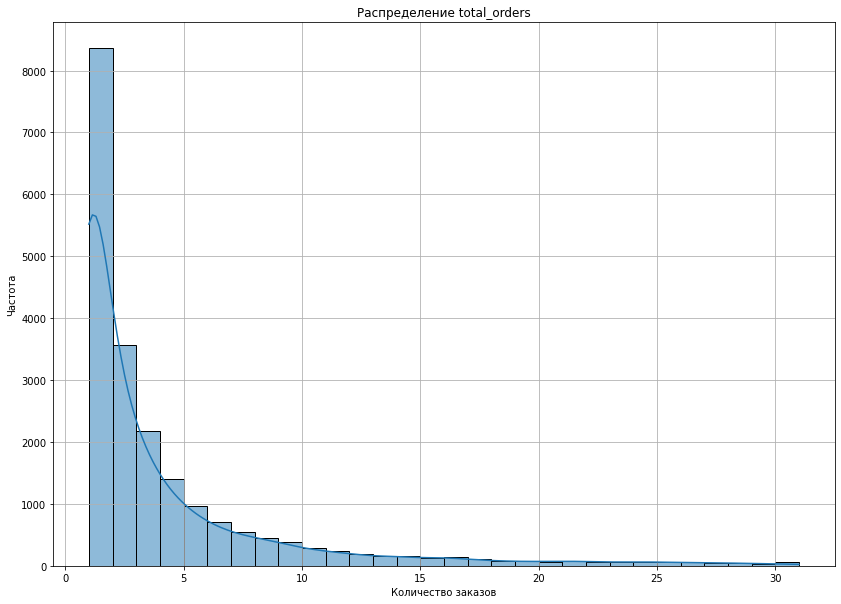

In [116]:
# Настроим график
plt.figure(figsize=(14, 10))
# Построим гистограммы
sns.histplot(user_prof['total_orders'], bins=30, kde=True)
# Добавим заголовок
plt.title('Распределение total_orders')
# Добавим подписи осей
plt.xlabel('Количество заказов')
plt.ylabel('Частота')
# Отобразим сетку на графике
plt.grid()
# Отобразим график
plt.show()

Распределение явно неравномерное. Сильный правый перекос: большинство наблюдений сосредоточено при малом количестве заказов, а небольшой процент — с большим числом (примерно до 30). Мода и медиана ближе к 1–3 заказам, а среднее, скорее всего, больше медианы из‑за длинного хвоста. Присутствуют «выбросы», редкие очень часто покупающие пользователи, которых лучше не удалять, это важные клиенты.

Преимущественно наблюдаются один или несколько заказов; есть ниша высокочастотных клиентов, **поэтому нужно сегментировать** и выстраивать разные стратегии: удержание и стратегия продаж, при которой продавец поощряет клиентов покупать более дорогую версию продукта, для «хвоста»; методы повышения повторных покупок для большинства.

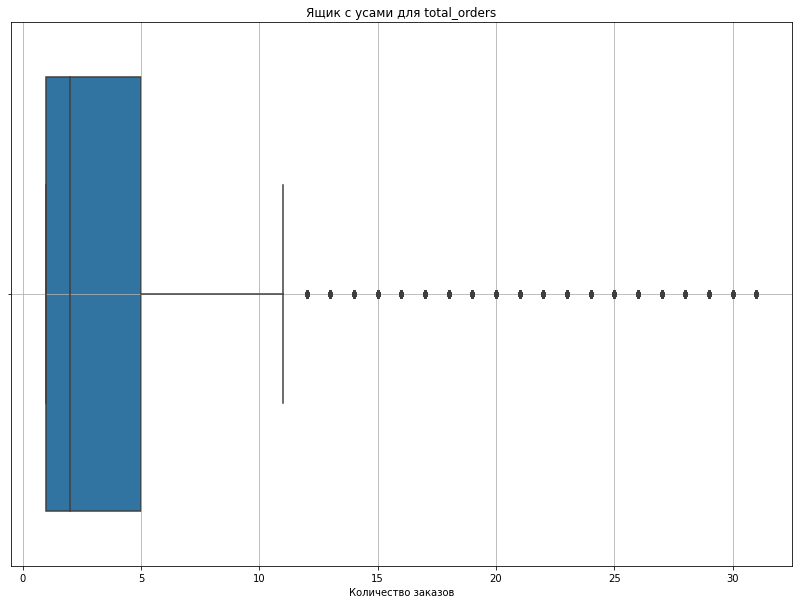

In [117]:
# Настроим график
plt.figure(figsize=(14, 10))
# Построим ящик с усами
sns.boxplot(x=user_prof['total_orders'])
# Добавим заголовок
plt.title('Ящик с усами для total_orders')
# Добавим подпис оси
plt.xlabel('Количество заказов')
# Добавим сетку на графике
plt.grid()
# Отобразим график
plt.show()

Большинство наблюдений сосредоточено в небольшой области слева (медиана и IQR малы), что говорит о том, что большинство клиентов делает немного заказов (порядка одного заказа). Характерный правый «хвост» показывает много отдельных точек далеко правее верхней границы уса, то есть существует небольшая группа покупателей с большим числом заказов (частые покупатели). Среднее будет завышено из‑за правых выбросов, гораздо надежнее использовать медиану и квартили для описания центральной тенденции. 

'\nPhi-корреляция для сегмента 1_order:'

Series([], dtype: float64)

'\nPhi-корреляция для сегмента 2_to_4_orders:'

first_order_date               0.229657
last_order_date                0.166502
first_device_type              0.004995
first_region                   0.000000
first_service_name             0.048705
first_event_type               0.000000
total_orders                   1.000000
average_revenue                0.108534
average_tickets                0.369298
average_days_between_orders    0.340750
Name: total_orders, dtype: float64

'\nPhi-корреляция для сегмента 5_and_more_orders:'

first_order_date               0.190574
last_order_date                0.067068
first_device_type              0.021029
first_region                   0.066198
first_service_name             0.072727
first_event_type               0.047345
total_orders                   1.000000
average_revenue                0.167201
average_tickets                0.118788
average_days_between_orders    0.717463
Name: total_orders, dtype: float64

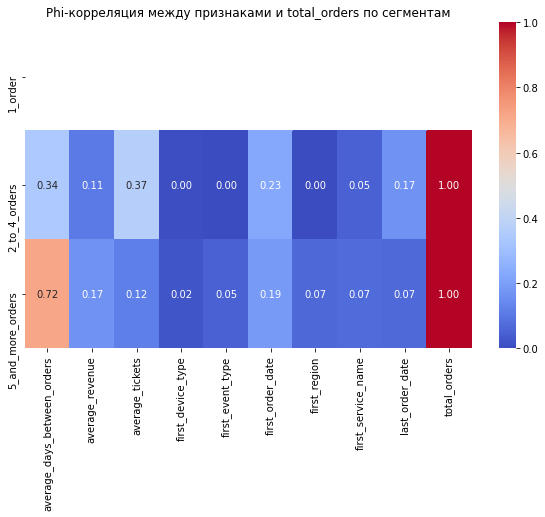

In [119]:
# Убедимся, что 'user_id' не включен в расчеты
user_prof = user_prof.drop(columns=['user_id'], errors='ignore')

# Разделяем пользователей на сегменты
segments = {
    "1_order": user_prof[user_prof['total_orders'] == 1],
    "2_to_4_orders": user_prof[(user_prof['total_orders'] >= 2) & (user_prof['total_orders'] <= 4)],
    "5_and_more_orders": user_prof[user_prof['total_orders'] >= 5]
}

# Явно задаем интервальные столбцы
interval_columns = ['total_orders', 'average_revenue', 'average_tickets', 'average_days_between_orders']

# Функция для вычисления корреляции с использованием phi_k
def calculate_phik(segment):
    if segment.shape[0] > 1:
        # Фильтруем столбцы с достаточным количеством уникальных значений
        valid_columns = segment.columns[segment.nunique() > 1]
        if 'total_orders' in valid_columns:
            return phik_matrix(segment[valid_columns], interval_cols=interval_columns).loc[:, 'total_orders']
    return pd.Series(dtype=float)  # Указываем тип данных явно

# Сохраняем результаты phi-корреляции для каждого сегмента
phik_correlations = {key: calculate_phik(value) for key, value in segments.items()}

# Выводим результаты
for segment_name, correlation in phik_correlations.items():
    display(f'\nPhi-корреляция для сегмента {segment_name}:')
    display(correlation)

# Визуализируем результаты phi-корреляции для сегментов
phik_correlation_df = pd.DataFrame(phik_correlations).T  # Создаем DataFrame из словаря
plt.figure(figsize=(10, 6))
sns.heatmap(phik_correlation_df, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Phi-корреляция между признаками и total_orders по сегментам')
plt.show()

**Сегмент 1_order** Пустая серия (Series([], dtype: float64)) может указывать на то, что в этом сегменте недостаточно данных для вычисления корреляции, либо все значения переменных одинаковы. Так и есть все пользователи с одним заказом.


**Сегмент 2_to_4_orders** 


Наиболее значимые корреляции:

  – average_tickets (0.369298) и average_days_between_orders (0.340750) имеют наибольшие положительные корреляции с total_orders. Это говорит о том, что пользователи, которые заказывают больше всего, также склонны заказывать больше билетов и имеют более короткие промежутки между заказами.
  
  – average_revenue (0.108534) показывает слабую положительную корреляцию, что означает, что пользователи с большим количеством заказов также могут тратить больше.
  
Не значимые корреляции:

  – first_region, first_event_type и first_device_type имеют очень низкие значения корреляции с total_orders, что говорит о том, что эти факторы не влияют на количество заказов в этом сегменте.

**Сегмент 5_and_more_orders**

Наиболее значимые корреляции:

  – average_days_between_orders (0.717463) имеет очень высокую положительную корреляцию с total_orders. Это может указывать на то, что пользователи, которые делают много заказов, имеют более регулярные покупки.
  
  – average_revenue (0.167201) и first_order_date (0.190574) также показывают положительные корреляции, но они менее значительны по сравнению с average_days_between_orders.
  
  
Не значимые корреляции:

  – Как и в предыдущем сегменте, переменные типа first_region, first_event_type и first_device_type имеют низкие значения корреляции.



Пользователи с большим количеством заказов (5 и более) имеют более выраженные зависимости между частотой покупок и другими метриками, такими как среднее время между заказами. Это может указывать на более устойчивое поведение и лояльность к продукту.

Некоторые переменные, такие как тип устройства или регион, не оказывают значительного влияния на количество заказов, что может означать, что эти факторы не являются ключевыми для понимания поведения пользователей.

#### промежуточный вывод по четвертому разделу

  Наиболее популярным типом мероприятия являются концерты, на которые приходится 44,29% всех пользователей. Это говорит о том, что концерты привлекают значительное количество участников. На втором месте находятся мероприятия под категорией "другое" (24,87%), что может указывать на разнообразие событий, которые не попадают в другие категории или не были категоризированы при сборе информации.  Остальные сегменты  имеют значительно меньшую долю пользователей. Это может свидетельствовать о том, что эти мероприятия менее привлекательны для аудитории или же о том, что они менее разнообразны и менее доступны.

  Большинство пользователей (82,88%) используют мобильные устройства для доступа к мероприятиям. Это свидетельствует о том, что мобильные платформы являются основным каналом взаимодействия с аудиторией. Доля пользователей, использующих компьютеры, составляет всего 17,12%. Это может указывать на то, что аудитория предпочитает мобильный доступ к контенту или мероприятиям, что может быть связано с удобством и доступностью мобильных приложений и сайтов.
  
  Каменевский регион является самым крупным по количеству пользователей, с 6770 пользователями, что составляет 32,63% от общего числа. Это свидетельствует о высокой активности и интересе к мероприятиям или услугам в этом регионе. Наблюдается значительное различие между регионами. В целом наблюдается выраженное неравномерное распределение пользователей по регионам.
  
  Оператор "Билеты без проблем" занимает лидирующую позицию с 4949 пользователями, что составляет 23,85% от общего числа. Это свидетельствует о его популярности и доверии со стороны пользователей. Наблюдается высокая конкуренция среди операторов. В целом, данные показывают явное преобладание нескольких крупных операторов на рынке, в то время как меньшие компании сталкиваются с трудностями в привлечении пользователей. Это создает возможности для роста и улучшения услуг среди менее популярных операторов.
  
  Пользователи почти всех типов мероприятий совершают повторные покупки в очень похожем диапазоне (примерно 55–63%). Самые высокие доли повторных заказов у выставок (62–63%) и театра (61–62%). Концерты и стендап — около 60%.Различия небольшие, поэтому в целом повторные покупки равномерно распределены по типам. Различия небольшие, поэтому в целом повторные покупки равномерно распределены по типам. 
  
  Общее количество пользователей на мобильных устройствах зарегистрировано 17195 пользователей, на компьютерах 3552 пользователя. Доля повторных заказов: доля пользователей, совершивших 2 и более заказов, выше среди пользователей компьютером (62.16%) по сравнению с мобильными (59.18%). 
  
   К лидерам среди регионов, доля пользователей которых сделали 2 и более заказа, отнесем Каменевский регион (более 60%), Североярская область (около 62%), Широковская область (около 64%). В целом наблюдается относительно ровная удерживаемость в лид‑регионах; есть пространство для улучшения в регионах с более низкой долей повторных заказов. 
   
  
У большинства операторов относительно высокая повторная покупаемость — порядка 60%. Но сегменты Прачечная, Край билетов, Дом культуры очень маленькие и их высокая доля искажает анализ. Разброс большой, следовательно на уровне этих метрик конкуренция высокая. Однако сегменты Билеты без проблем (2899, 59%), Мой билет (1690, 59%), Лови билет! (1608, 59%), Билеты в руки (1467, 61%), Облачко (1256, 60%) самые крупные среди билетных операторов, поэтому целесообразней к лидерам отнести именно эти сегменты.
  
  Гипотеза 1. Тип мероприятия влияет на вероятность возврата на Яндекс Афишу: пользователи, которые совершили первый заказ на спортивные мероприятия, совершают повторный заказ чаще, чем пользователи, оформившие свой первый заказ на концерты.
  Пользователи, которые совершили первый заказ на спортивные мероприятия, совершают повторный заказ **реже** - 54.4%, чем пользователи, оформившие свой первый заказ на концерты - 60.3%. Опираясь на выводы, сделанные выше, Гипотеза 1  **не подтвердилась**. 
  
Гипотеза 2. В регионах, где больше всего пользователей посещают мероприятия, выше доля повторных заказов, чем в менее активных регионах. Подтвердилась.


Пользователи с 1 заказом сосредоточены в зоне очень низкой средней выручки с билета, пик близок к нулю и малым суммам до 100 руб. Возвращающиеся пользователи в целом смещены вправо. Их средняя выручка с билета выше (большая доля в диапазоне средних сумм 100–400 руб.), то есть повторные покупатели приносят больше на одну покупку. При этом распределения перекрываются: не все пользователи с 1 заказом дают мало выручки и не все вернувшиеся дают много; есть общие пересечения и отдельные крупные выбросы в обеих группах. Но больше выбросов наблюдается у пользователей с 1 заказом (до 1800). Пользователи с 2 и более заказами дают выше средний чек. 

Удержанные пользователи приносят немного больше выручки на билет, значит инвестиции в программы удержания/повторных покупок вероятно окупятся.

Пиковая плотность у пользователей с 5 и более заказами чуть смещена в сторону больших значений (примерно 400–600 руб.). У пользователей с 2–4 заказами видно больше массы на очень низких значениях от 0 до примерно 300 руб. (больше маленьких средних чеков) и немного больше хвост на больших чеках (значения доходят до 3000 руб.). 
То есть у лояльных пользователей (с 5 и более заказами) типичный средний чек немного выше и распределение более сконцентрировано, у малоактивных (с 2-4 заказами) больше разброса и доля очень маленьких чеков.


Пользователи, которые покупают от 1 до 2 билетов (сегмент 1-2), составляют значительное количество (2406 пользователей) и имеют довольно высокую долю повторных покупок (51.16%). Это говорит о том, что более половины этих пользователей возвращаются для повторной покупки. Пользователи, покупающие от 2 до 3 билетов (сегмент 2-3), имеют наивысшую долю повторных покупок (71.34%) при числе пользователей 8751. Это может свидетельствовать о том, что этот сегмент наиболее лоялен и активно использует услуги. Сегмент 3-5 показывает умеренную долю повторных покупок (53.60%) при количестве пользователей 8929. Это также подтверждает, что пользователи с большим количеством билетов склонны к повторным покупкам, но не так сильно, как в сегменте 2-3. Сегмент 5+ имеет наименьшее количество пользователей (661) и самую низкую долю повторных покупок (18.76%). Это может указывать на то, что пользователи, которые делают много покупок за раз, могут быть менее заинтересованы в повторных покупках, возможно, из-за удовлетворенности от одного крупного приобретения или из-за того, что они уже достигли своей цели.

 Сегменты с средним количеством билетов (2-3 и 3-5) показывают более высокую активность и лояльность, что может быть связано с тем, что эти пользователи находятся на этапе знакомства с продуктом или услугой. Высокая доля повторных покупок в сегменте 2-3 может указывать на успешные маркетинговые стратегии или удовлетворенность пользователей, что стоит использовать для дальнейшего продвижения и стимулирования повторных покупок.

Учитывая высокую лояльность сегмента 2-3, можно рассмотреть возможность введения программ лояльности или специальных предложений для этого сегмента, чтобы увеличить количество повторных покупок и удержание клиентов. Для сегмента 5+ стоит проанализировать причины низкой доли повторных покупок и рассмотреть возможность улучшения пользовательского опыта или предложения дополнительных услуг для повышения интереса к повторным покупкам.

Данные показывают, что поведение пользователей варьируется в зависимости от количества билетов, которые они покупают. Сегменты с меньшим количеством билетов демонстрируют более высокую лояльность, в то время как пользователи с большим количеством билетов могут требовать дополнительного внимания для повышения их вовлеченности и частоты повторных покупок.

 Пятница (3163 пользователя) и Суббота (3120 пользователя) являются днями с наибольшим числом пользователей, что может указывать на то, что в эти дни пользователи наиболее активно совершают покупки.

Понедельник демонстрирует наивысшую долю повторных покупателей (61.61%), что может свидетельствовать о том, что пользователи, совершившие покупки в начале недели, более склонны возвращаться. Вторник и Среда также показывают высокие показатели повторных покупок (59.99% и 60.98% соответственно), что говорит о стабильной лояльности пользователей в начале недели. Наименьшая доля повторных покупателей наблюдается в Четверг (58.29%) и Воскресенье (58.01%), что может указывать на снижение интереса или активности пользователей в эти дни.

 **Тенденции по дням недели**
   Первые три дня недели (Понедельник, Вторник, Среда) показывают высокую долю повторных покупок, что может говорить о том, что пользователи начинают неделю с намерением совершать покупки. Однако в эти дни недели количество пользователей не самое высокое. В то же время, в конце недели (Четверг, Пятница, Суббота) наблюдается  немного меньшая лояльность, несмотря на большее общее количество пользователей. А в Воскресенье люди отдыхают даже от покупок.
   
Когда при планировании досуга возвращаемость остаётся примерно одинаковой — это говорит о том, что день недели первой покупки не влияет на лояльность, а повторное использование сервиса определяется скорее качеством опыта и интересом к мероприятиям.

Пользователи с 2–4 заказами имеют среднее время между заказами 21.44 дня, что указывает на более длительный интервал между их покупками. Это может свидетельствовать о том, что такие пользователи менее активны или менее склонны к частым покупкам. Пользователи с 5 и более заказами имеют значительно меньшее среднее время между заказами — 11.21 дня. Это говорит о высокой активности и вероятной лояльности этих пользователей, которые более склонны совершать частые покупки.

Вероятность повторного заказа для обеих групп пользователей составляет 1.00 (или 100%). Это означает, что все пользователи в обеих группах, по данным анализа, совершают повторные заказы. Это может быть связано с тем, что они уже имеют положительный опыт покупок и удовлетворены продуктом или услугой.

Данные показывают, что пользователи с большим количеством заказов более активны и склонны к частым покупкам, в то время как пользователи с меньшим количеством заказов требуют дополнительных усилий для повышения их активности. Оба сегмента пользователей имеют высокую вероятность повторного заказа, что является положительным знаком для Яндекс Афиши.

На основе полученной **корреляционной матрицы** с использованием **коэффициента phi_k** для переменной total_orders можно сделать следующие наблюдения:

Переменные is_five и is_two показывают наиболее значимые взаимосвязи с количеством заказов, что предполагает, что пользователи, которые уже сделали несколько заказов, могут продолжать заказывать в будущем. Остальные переменные демонстрируют более слабые взаимосвязи с количеством заказов.
Полученные значения близки к нулю, поэтому следует проверить разброс данных в total_orders. Такое возможно, когда в данных преобладает одно значение. И тогда корреляционный анализ может показать отсутствие связей. 

Распределение по total_orders явно неравномерное. Сильный правый перекос: большинство наблюдений сосредоточено при малом количестве заказов, а небольшой процент — с большим числом (примерно до 30). Мода и медиана ближе к 1–3 заказам, а среднее, скорее всего, больше медианы из‑за длинного хвоста. Присутствуют «выбросы», редкие очень часто покупающие пользователи, которых лучше не удалять, это важные клиенты.

Преимущественно наблюдаются один или несколько заказов; есть ниша высокочастотных клиентов, **поэтому нужно сегментировать** и выстраивать разные стратегии: удержание и стратегия продаж, при которой продавец поощряет клиентов покупать более дорогую версию продукта, для «хвоста»; методы повышения повторных покупок для большинства.

**Сегмент 1_order** Пустая серия (Series([], dtype: float64)) может указывать на то, что в этом сегменте недостаточно данных для вычисления корреляции, либо все значения переменных одинаковы. Так и есть все пользователи с одним заказом.


**Сегмент 2_to_4_orders** 


Наиболее значимые корреляции:

  – average_tickets (0.369298) и average_days_between_orders (0.340750) имеют наибольшие положительные корреляции с total_orders. Это говорит о том, что пользователи, которые заказывают больше всего, также склонны заказывать больше билетов и имеют более короткие промежутки между заказами.
  
  – average_revenue (0.108534) показывает слабую положительную корреляцию, что означает, что пользователи с большим количеством заказов также могут тратить больше.
  
Не значимые корреляции:

  – first_region, first_event_type и first_device_type имеют очень низкие значения корреляции с total_orders, что говорит о том, что эти факторы не влияют на количество заказов в этом сегменте.

**Сегмент 5_and_more_orders**

Наиболее значимые корреляции:

  – average_days_between_orders (0.717463) имеет очень высокую положительную корреляцию с total_orders. Это может указывать на то, что пользователи, которые делают много заказов, имеют более регулярные покупки.
  
  – average_revenue (0.167201) и first_order_date (0.190574) также показывают положительные корреляции, но они менее значительны по сравнению с average_days_between_orders.
  
  
Не значимые корреляции:

  – Как и в предыдущем сегменте, переменные типа first_region, first_event_type и first_device_type имеют низкие значения корреляции.


Пользователи с большим количеством заказов (5 и более) имеют более выраженные зависимости между частотой покупок и другими метриками, такими как среднее время между заказами. Это может указывать на более устойчивое поведение и лояльность к продукту.

Некоторые переменные, такие как тип устройства или регион, не оказывают значительного влияния на количество заказов, что может означать, что эти факторы не являются ключевыми для понимания поведения пользователей.

### общий вывод и рекомендации

В конце проекта напишите общий вывод и рекомендации: расскажите заказчику, на что нужно обратить внимание. В выводах кратко укажите:

- **Информацию о данных**, с которыми вы работали, и то, как они были подготовлены: например, расскажите о фильтрации данных, переводе тенге в рубли, фильтрации выбросов.
- **Основные результаты анализа.** Например, укажите:
    - Сколько пользователей в выборке? Как распределены пользователи по числу заказов? Какие ещё статистические показатели вы подсчитали важным во время изучения данных?
    - Какие признаки первого заказа связаны с возвратом пользователей?
    - Как связаны средняя выручка и количество билетов в заказе с вероятностью повторных покупок?
    - Какие временные характеристики влияют на удержание (день недели, интервалы между покупками)?
    - Какие характеристики первого заказа и профиля пользователя могут быть связаны с числом покупок согласно результатам корреляционного анализа?
- Дополните выводы информацией, которая покажется вам важной и интересной. Следите за общим объёмом выводов — они должны быть компактными и ёмкими.

В конце предложите заказчику рекомендации о том, как именно действовать в его ситуации. Например, укажите, на какие сегменты пользователей стоит обратить внимание в первую очередь, а какие нуждаются в дополнительных маркетинговых усилиях.

 Данные о выручке сервиса были представлены в российских рублях и казахстанских тенге. Используя датасет с информацией о курсе казахстанского тенге по отношению к российскому рублю за 2024 год, выручка в казахстанских тенге была переведена в российские рубли, в результате чего в датафрейм добавлен новый столбец revenue_rub. Теперь датафрейм df содержит 16 столбцов и 290611 строк. Объем занимаемой памяти составляет 35.5 MB.
   Выгрузка из SQL была успешной, поэтому пропуски только в столбце days_since_prev (21933 пропуска, что составляет 7.6%). Так как пропуски свидетельствуют о совершении пользоватеями одной покупки мы заменили их на 0. Типы данных откорректированы: столбцы  `device_type_canonical` (фиксированный набор уникальных типов) и `event_type_main` приведены к типу данных  `category`; тип данных в столбце 'days_since_prev' приведен к `int`. Разрядность отдельных столбцов (`order_id`, `tickets_count', 'days_since_prev', 'event_id`, `revenue', 'revenue_rub`) понижена. В столбце `order_dt` обнулили время и оставили только дату. В столбце `order_ts` убрали наносекунды. Изучение значений ключевых столбцов не выявило наличие номинальных значений ('unknown' или 'не указано') и пустых строк. Однако, среди типов мероприятий выявлена категория "другое", что говорит о том, что некоторые мероприятия не категоризированы. Явные дубликаты в датафрейме отсутвуют. При это обнаружено 46 неявных дубликатов (0.02%), которые удалены.  В ходе анализа было выявлено, что количество билетов при всей своей вариативности относительно однородно, тогда как выручка имеет значительные колебания.
По результатам анализа было принято решение - удалить отрицательные значения в revenue_rub (возвраты, ошибки в данных), что поможет сделать нам датафрейм более чистым и упростит дальнейший анализ. Так же это позволит сосредоточиться на положительных значениях, которые отражают реальную выручку. Так же в связи с обнаружением выбросов  в поле revenue_rub, мы отфильтровали значения по 99 перцентилю. 
После проведенных преобразований датафрейма общее количество памяти, используемой нашим датафреймом, уменьшилось на 10.0 MB и составило 25.5 MB.  Это может помочь нам в оптимизации использования памяти. Теперь датафрейм содержит 16 столбцов и 287359 строк.


Для отдела маркетинга, планирующего создать модель для прогнозирования возврата пользователей, мы создали профили пользователей, включающие агрегированные признаки, описывающие поведение и профиль каждого пользователя. Полученнй нами профиль пользователя 'user_profile' содержит 13 столбцов и 21838 строк. Объем занимаемой памяти составляет 2.1 MB.
   Доля пользователей, совершивших 2 и более заказов, составила 61.70%. Более половины пользователей (более 60%) делают повторные заказы, что говорит о том, что Яндекс Афиша имеет стабильную клиентскую базу и успешные стратегии удержания клиентов. Это также может свидетельствовать о качестве предоставляемых услуг. 
   Доля пользователей, совершивших 5 и более заказов, составила 28.99%. Более четверти пользователей делает 5 и более заказов, что указывает на наличие лояльных клиентов. Это может быть положительным знаком для Яндекс Афиши, поскольку лояльные клиенты чаще других могут рекомендовать компанию другим. Однако, доля этих пользователей ниже чем доля пользователей совершивших 2 и более заказа.
   В целом Яндекс Афиша демонстрирует положительные показатели: значительное количество пользователей, относительно высокая средняя выручка с заказа и хорошая доля повторных покупок. Это свидетельствует о том, что услуги востребованы, а также о наличии эффективных стратегий по удержанию клиентов. Для дальнейшего роста стоит продолжать работу над увеличением числа повторных заказов и привлечение новых клиентов.
   Необходимо отметить, что существует значительное разнообразие в поведении пользователей. Некоторые из них делают много заказов и часто, в то время как другие могут быть менее активными. Важно учитывать, что высокие значения по количеству заказов могут быть вызваны несколькими "активными" пользователями, которые значительно увеличивают средние показатели. Средние значения по количеству билетов и времени между заказами показывают, что пользователи склонны делать несколько покупок и возвращаться через короткие промежутки времени. Тем не менее в распределении наблюдаются выбросы и, чтобы исключить из анализа выбросы для total_orders, мы применили фильтрацию данных по 95-му перцентилю.
   В результате после проведенной фильтрации экстремально высокие выбросы отсутствуют. Некоторые покупатели делают много заказов и часто, в то время как другие могут быть менее активными. Средние значения по количеству билетов и времени между заказами показывают, что пользователи склонны делать несколько покупок и возвращаться через короткие промежутки времени.
   После приведения данных в соотвествие и устранений аномалий, мы приступили к проведению исследовательского анализа данных. 
   
   
   Наиболее популярным типом мероприятия являются концерты, на которые приходится 44,29% всех пользователей. Это говорит о том, что концерты привлекают значительное количество участников. На втором месте находятся мероприятия под категорией "другое" (24,87%), что может указывать на разнообразие событий, которые не попадают в другие категории или не были категоризированы при сборе информации.  Остальные сегменты  имеют значительно меньшую долю пользователей. Это может свидетельствовать о том, что эти мероприятия менее привлекательны для аудитории или же о том, что они менее разнообразны и менее доступны. 
   **Рекомендации** Учитывая высокую долю концертов, стоит рассмотреть возможность расширения программ и предложений в этой категории, а также анализировать, какие именно концерты наиболее востребованы. Для категорий с низкой долей пользователей (спорт, стендап, выставки) можно провести дополнительные исследования для выявления причин низкой популярности и рассмотреть возможность маркетинговых акций или улучшения качества предлагаемых мероприятий.  В целом, данные показывают четкую иерархию предпочтений среди пользователей, что может помочь в дальнейшем планировании мероприятий и разработке стратегий по привлечению аудитории.
    
  Данные показывают явное преобладание мобильных устройств (82,88%) среди пользователей, что должно стать основой для дальнейшего развития и оптимизации услуг и контента. Аудитория предпочитает мобильный доступ к контенту или мероприятиям, что может быть связано с удобством и доступностью мобильных приложений и сайтов. 
  **Рекомендации** Учитывая высокую долю мобильных пользователей, важно сосредоточиться на улучшении интерфейса мобильного приложения или сайта, увеличении скорости загрузки страниц и удобства навигации. Также стоит рассмотреть возможность разработки специализированного контента или функций, которые могут быть полезны именно для мобильных пользователей. Рекомендуется направить маркетинговые усилия на мобильные платформы, включая рекламу в социальных сетях, мобильные уведомления и специальные предложения для пользователей мобильных устройств.
  
  Данные показывают явное преобладание пользователей в Каменевском регионе (6770 пользователей, что составляет 32,63%) и значительное неравномерное распределение среди других регионов, что открывает возможности для улучшения стратегии маркетинга и привлечения пользователей.
  **Рекомендации** Учитывая значительное количество пользователей в Каменевском регионе, можно рассмотреть возможность расширения мероприятий или услуг именно в этом регионе. В других регионах стоит проанализировать причины низкой активности и разработать стратегии для привлечения пользователей, такие как локализованные рекламные кампании или специальные предложения.
Необходимо провести более глубокий анализ целевой аудитории в каждом регионе, чтобы понять их потребности и предпочтения. Это поможет лучше адаптировать контент и услуги для привлечения новых пользователей.

  Оператор "Билеты без проблем" занимает лидирующую позицию с 4949 пользователями, что составляет 23,85% от общего числа. Это свидетельствует о его популярности и доверии со стороны пользователей. Наблюдается высокая конкуренция среди операторов. В целом, данные показывают явное преобладание нескольких крупных операторов на рынке, в то время как меньшие компании сталкиваются с трудностями в привлечении пользователей. Это создает возможности для роста и улучшения услуг среди менее популярных операторов.
  **Рекомендации** Операторам с низким количеством пользователей стоит рассмотреть возможности для улучшения своих услуг, повышения видимости и маркетинга, чтобы привлечь больше клиентов. Это может включать в себя улучшение сервиса, акционные предложения или сотрудничество с другими организациями.

Пользователи почти всех типов мероприятий совершают повторные покупки в очень похожем диапазоне (примерно 55–63%). Самые высокие доли повторных заказов у выставок (62–63%) и театра (61–62%). Концерты и стендап — около 60%.Различия небольшие, поэтому в целом повторные покупки равномерно распределены по типам. Различия небольшие, поэтому в целом повторные покупки равномерно распределены по типам. 
 **Рекомендации** Стоит изучить, почему выставки и театр дают чуть больше повторных покупок (контент, частота событий, лояльность аудитории) и распространить успешные практики на другие категории. Для спорта и «ёлок» можно протестировать меры по повышению повторных покупок (таргетированные акции, бонусы, подписки).

  Общее количество пользователей на мобильных устройствах зарегистрировано 17195 пользователей, на компьютерах 3552 пользователя. Доля повторных заказов: доля пользователей, совершивших 2 и более заказов, выше среди пользователей компьютером (62.16%) по сравнению с мобильными (59.18%). 
  **Рекомендуется** проанализировать поведение пользователей на различных устройствах и рассмотреть возможность оптимизации мобильного опыта для повышения доли повторных покупок. Уделить внимание улучшению мобильного интерфейса и функционала для повышения конверсии. Рассмотреть возможность проведения маркетинговых акций, направленных на мобильных пользователей, чтобы увеличить их долю повторных заказов. 
  
  К лидерам среди регионов, доля пользователей которых сделали 2 и более заказа, отнесем Каменевский регион (более 60%), Североярская область (около 62%), Широковская область (около 64%). В целом наблюдается относительно ровная удерживаемость в лид‑регионах; есть пространство для улучшения в регионах с более низкой долей повторных заказов. 
  **Рекомендации**: изучить успешные практики лидеров и применить их в регионах‑аутсайдерах; провести дополнительные исследования (каналы привлечения, ассортимент, логистика, акции) в регионах с низкой долей повторных покупок.
  
  Большинство операторов относительно высокая повторная покупаемость — порядка 60%. Но сегменты Прачечная, Край билетов, Дом культуры очень маленькие и их высокая доля искажает анализ. Разброс большой, следовательно на уровне этих метрик конкуренция высокая. Однако сегменты Билеты без проблем (2899, 59%), Мой билет (1690, 59%), Лови билет! (1608, 59%), Билеты в руки (1467, 61%), Облачко (1256, 60%) самые крупные среди билетных операторов, поэтому целесообразней к лидерам отнести именно эти сегменты.
  
   Гипотеза 1. Тип мероприятия влияет на вероятность возврата на Яндекс Афишу: пользователи, которые совершили первый заказ на спортивные мероприятия, совершают повторный заказ чаще, чем пользователи, оформившие свой первый заказ на концерты.
  Пользователи, которые совершили первый заказ на спортивные мероприятия, совершают повторный заказ **реже** - 54.4%, чем пользователи, оформившие свой первый заказ на концерты - 60.3%. Опираясь на выводы, сделанные выше, Гипотеза 1  **не подтвердилась**. 
  
Гипотеза 2. В регионах, где больше всего пользователей посещают мероприятия, выше доля повторных заказов, чем в менее активных регионах. Подтвердилась.   


Пользователи с 1 заказом сосредоточены в зоне очень низкой средней выручки с билета, пик близок к нулю и малым суммам до 100 руб. Возвращающиеся пользователи в целом смещены вправо. Их средняя выручка с билета выше (большая доля в диапазоне средних сумм 100–400 руб.), то есть повторные покупатели приносят больше на одну покупку. При этом распределения перекрываются: не все пользователи с 1 заказом дают мало выручки и не все вернувшиеся дают много; есть общие пересечения и отдельные крупные выбросы в обеих группах. Но больше выбросов наблюдается у пользователей с 1 заказом (до 1800). Пользователи с 2 и более заказами дают выше средний чек. 

Удержанные пользователи приносят немного больше выручки на билет, значит инвестиции в программы удержания/повторных покупок вероятно окупятся.

**Рекомендации** Сфокусироваться на удержании: повышение доли вернувшихся пользователей должно увеличить среднюю выручку.
 
Пиковая плотность у пользователей с 5 и более заказами чуть смещена в сторону больших значений (примерно 400–600 руб.). У пользователей с 2–4 заказами видно больше массы на очень низких значениях от 0 до примерно 300 руб. (больше маленьких средних чеков) и немного больше хвост на больших чеках (значения доходят до 3000 руб.). 
То есть у лояльных пользователей (с 5 и более заказами) типичный средний чек немного выше и распределение более сконцентрировано, у малоактивных (с 2-4 заказами) больше разброса и доля очень маленьких чеков.

**Лояльные** клиенты в среднем тратят чуть больше за заказ — это аргумент в пользу инвестиций в удержание и программы лояльности. В то же время значительная общая схожесть распределений говорит, что разница не драматична — акцент можно делать на увеличении частоты покупок и средних чеков одновременно.


Пользователи, которые покупают от 1 до 2 билетов (сегмент 1-2), составляют значительное количество (2406 пользователей) и имеют довольно высокую долю повторных покупок (51.16%). Это говорит о том, что более половины этих пользователей возвращаются для повторной покупки. Пользователи, покупающие от 2 до 3 билетов (сегмент 2-3), имеют наивысшую долю повторных покупок (71.34%) при числе пользователей 8751. Это может свидетельствовать о том, что этот сегмент наиболее лоялен и активно использует услуги. Сегмент 3-5 показывает умеренную долю повторных покупок (53.60%) при количестве пользователей 8929. Это также подтверждает, что пользователи с большим количеством билетов склонны к повторным покупкам, но не так сильно, как в сегменте 2-3. Сегмент 5+ имеет наименьшее количество пользователей (661) и самую низкую долю повторных покупок (18.76%). Это может указывать на то, что пользователи, которые делают много покупок за раз, могут быть менее заинтересованы в повторных покупках, возможно, из-за удовлетворенности от одного крупного приобретения или из-за того, что они уже достигли своей цели.

 Сегменты с средним количеством билетов (2-3 и 3-5) показывают более высокую активность и лояльность, что может быть связано с тем, что эти пользователи находятся на этапе знакомства с продуктом или услугой. Высокая доля повторных покупок в сегменте 2-3 может указывать на успешные маркетинговые стратегии или удовлетворенность пользователей, что стоит использовать для дальнейшего продвижения и стимулирования повторных покупок.

Учитывая высокую лояльность сегмента 2-3, можно рассмотреть возможность введения программ лояльности или специальных предложений для этого сегмента, чтобы увеличить количество повторных покупок и удержание клиентов. Для сегмента 5+ стоит проанализировать причины низкой доли повторных покупок и рассмотреть возможность улучшения пользовательского опыта или предложения дополнительных услуг для повышения интереса к повторным покупкам.

Данные показывают, что поведение пользователей варьируется в зависимости от количества билетов, которые они покупают. Сегменты с меньшим количеством билетов демонстрируют более высокую лояльность, в то время как пользователи с большим количеством билетов могут требовать дополнительного внимания для повышения их вовлеченности и частоты повторных покупок.

 Пятница (3163 пользователя) и Суббота (3120 пользователя) являются днями с наибольшим числом пользователей, что может указывать на то, что в эти дни пользователи наиболее активно совершают покупки.

Понедельник демонстрирует наивысшую долю повторных покупателей (61.61%), что может свидетельствовать о том, что пользователи, совершившие покупки в начале недели, более склонны возвращаться. Вторник и Среда также показывают высокие показатели повторных покупок (59.99% и 60.98% соответственно), что говорит о стабильной лояльности пользователей в начале недели. Наименьшая доля повторных покупателей наблюдается в Четверг (58.29%) и Воскресенье (58.01%), что может указывать на снижение интереса или активности пользователей в эти дни.

 **Тенденции по дням недели**
   Первые три дня недели (Понедельник, Вторник, Среда) показывают высокую долю повторных покупок, что может говорить о том, что пользователи начинают неделю с намерением совершать покупки. Однако в эти дни недели количество пользователей не самое высокое. В то же время, в конце недели (Четверг, Пятница, Суббота) наблюдается  немного меньшая лояльность, несмотря на большее общее количество пользователей. А в Воскресенье люди отдыхают даже от покупок.
   
Когда при планировании досуга возвращаемость остаётся примерно одинаковой — это говорит о том, что день недели первой покупки не влияет на лояльность, а повторное использование сервиса определяется скорее качеством опыта и интересом к мероприятиям.

Пользователи с 2–4 заказами имеют среднее время между заказами 21.44 дня, что указывает на более длительный интервал между их покупками. Это может свидетельствовать о том, что такие пользователи менее активны или менее склонны к частым покупкам. Пользователи с 5 и более заказами имеют значительно меньшее среднее время между заказами — 11.21 дня. Это говорит о высокой активности и вероятной лояльности этих пользователей, которые более склонны совершать частые покупки.

Вероятность повторного заказа для обеих групп пользователей составляет 1.00 (или 100%). Это означает, что все пользователи в обеих группах, по данным анализа, совершают повторные заказы. Это может быть связано с тем, что они уже имеют положительный опыт покупок и удовлетворены продуктом или услугой.

Данные показывают, что пользователи с большим количеством заказов более активны и склонны к частым покупкам, в то время как пользователи с меньшим количеством заказов требуют дополнительных усилий для повышения их активности. Оба сегмента пользователей имеют высокую вероятность повторного заказа, что является положительным знаком для Яндекс Афиши.

**Фокус на активных пользователях** Для пользователей с 5 и более заказами стоит продолжать поддерживать их лояльность, возможно, через программы лояльности, специальные предложения или персонализированные рекомендации.

**Работа с менее активными пользователями** Для пользователей с 2–4 заказами стоит рассмотреть стратегии по увеличению их активности. Это может включать в себя специальные акции, напоминания о покупке или улучшение пользовательского опыта, чтобы сократить время между их заказами.

На основе полученной **корреляционной матрицы** с использованием **коэффициента phi_k** для переменной total_orders можно сделать следующие наблюдения:

Переменные is_five и is_two показывают наиболее значимые взаимосвязи с количеством заказов, что предполагает, что пользователи, которые уже сделали несколько заказов, могут продолжать заказывать в будущем. Остальные переменные демонстрируют более слабые взаимосвязи с количеством заказов.
Полученные значения близки к нулю, поэтому следует проверить разброс данных в total_orders. Такое возможно, когда в данных преобладает одно значение. И тогда корреляционный анализ может показать отсутствие связей. 

Распределение по total_orders явно неравномерное. Сильный правый перекос: большинство наблюдений сосредоточено при малом количестве заказов, а небольшой процент — с большим числом (примерно до 30). Мода и медиана ближе к 1–3 заказам, а среднее, скорее всего, больше медианы из‑за длинного хвоста. Присутствуют «выбросы», редкие очень часто покупающие пользователи, которых лучше не удалять, это важные клиенты.

Преимущественно наблюдаются один или несколько заказов; есть ниша высокочастотных клиентов, **поэтому нужно сегментировать** и выстраивать разные стратегии: удержание и стратегия продаж, при которой продавец поощряет клиентов покупать более дорогую версию продукта, для «хвоста»; методы повышения повторных покупок для большинства.

**Сегмент 1_order** Пустая серия (Series([], dtype: float64)) может указывать на то, что в этом сегменте недостаточно данных для вычисления корреляции, либо все значения переменных одинаковы. Так и есть все пользователи с одним заказом.


**Сегмент 2_to_4_orders** 


Наиболее значимые корреляции:

  – average_tickets (0.369298) и average_days_between_orders (0.340750) имеют наибольшие положительные корреляции с total_orders. Это говорит о том, что пользователи, которые заказывают больше всего, также склонны заказывать больше билетов и имеют более короткие промежутки между заказами.
  
  – average_revenue (0.108534) показывает слабую положительную корреляцию, что означает, что пользователи с большим количеством заказов также могут тратить больше.
  
Не значимые корреляции:

  – first_region, first_event_type и first_device_type имеют очень низкие значения корреляции с total_orders, что говорит о том, что эти факторы не влияют на количество заказов в этом сегменте.

**Сегмент 5_and_more_orders**

Наиболее значимые корреляции:

  – average_days_between_orders (0.717463) имеет очень высокую положительную корреляцию с total_orders. Это может указывать на то, что пользователи, которые делают много заказов, имеют более регулярные покупки.
  
  – average_revenue (0.167201) и first_order_date (0.190574) также показывают положительные корреляции, но они менее значительны по сравнению с average_days_between_orders.
  
  
Не значимые корреляции:

  – Как и в предыдущем сегменте, переменные типа first_region, first_event_type и first_device_type имеют низкие значения корреляции.


Пользователи с большим количеством заказов (5 и более) имеют более выраженные зависимости между частотой покупок и другими метриками, такими как среднее время между заказами. Это может указывать на более устойчивое поведение и лояльность к продукту.

Некоторые переменные, такие как тип устройства или регион, не оказывают значительного влияния на количество заказов, что может означать, что эти факторы не являются ключевыми для понимания поведения пользователей.

###  финализация проекта и публикация в Git

Когда вы закончите анализировать данные, оформите проект, а затем опубликуйте его.

Выполните следующие действия:

1. Создайте файл `.gitignore`. Добавьте в него все временные и чувствительные файлы, которые не должны попасть в репозиторий.
2. Сформируйте файл `requirements.txt`. Зафиксируйте все библиотеки, которые вы использовали в проекте.
3. Вынести все чувствительные данные (параметры подключения к базе) в `.env`файл.
4. Проверьте, что проект запускается и воспроизводим.
5. Загрузите проект в публичный репозиторий — например, на GitHub. Убедитесь, что все нужные файлы находятся в репозитории, исключая те, что в `.gitignore`. Ссылка на репозиторий понадобится для отправки проекта на проверку. Вставьте её в шаблон проекта в тетрадке Jupyter Notebook перед отправкой проекта на ревью.

**Вставьте ссылку на проект в этой ячейке тетрадки перед отправкой проекта на ревью.**
https://github.com/Karin2025-evi/my_second_final_project